In [1]:
import drag_functions_turb as fn
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from time_TvsR import *
from matplotlib.ticker import MultipleLocator
import scipy.optimize as opt
from matplotlib.colors import LogNorm
from cycler import cycler
from PebAcc_Turb import *

%matplotlib inline
# plt.rcParams['legend.frameon'] = True
# plt.rcParams['legend.borderpad'] = 0.5
# plt.rcParams['legend.labelspacing'] = 0.1
# plt.rcParams['legend.handletextpad'] = 0.1
# plt.rcParams['font.size'] = 18
# mpl.rcParams['legend.numpoints'] = 1
# plt.rc('lines', linewidth=1.0)
# mpl.rcParams['font.family'] = "serif"
# mpl.rcParams['text.usetex'] = True
# mpl.rcParams['ytick.right'] = True
# mpl.rcParams['ytick.direction'] = "in"
# mpl.rcParams['xtick.top'] = True
# mpl.rcParams['xtick.direction'] = "in"
# mpl.rcParams['figure.figsize'] = (6,4)
# mpl.rcParams['axes.titlesize'] = 20
# mpl.rcParams['axes.labelsize'] = 20
# mpl.rcParams['xtick.labelsize'] = 16
# mpl.rcParams['ytick.labelsize'] = 16
# mpl.rcParams['legend.fontsize'] = 20
# mpl.rcParams['figure.dpi'] = 100
# mpl.rcParams['savefig.dpi'] = 100

colors = ['#4D4D4D','#5DA5DA', '#FAA43A', '#60BD68', '#F17CB0','#B2912F','#B276B2','#DECF3F','#F15854']
          # (black), (blue), (orange), (green), (pink), (brown), (purple), (yellow), (red)
mpl.rcParams['axes.prop_cycle'] = cycler(color=colors)

# Begin with star 1

In [2]:
#Disk surface density parameters
m_star = 0.1
sig_0 = 500.
r_crit = 30.

def disk_sigma(r=1., sigma0=500., rcrit=100.):
    r_c = rcrit
    gamma = 1.
    sigma = sigma0*((r/r_c)**(-gamma))*np.exp(-(r/r_c)**(2-gamma))
    return sigma

/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: divide by zero encountered in double_scalars
  if __name__ == '__main__':


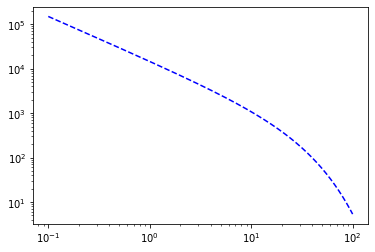

In [3]:
r_arr = np.linspace(0,100, 1000)
sig_arr = np.zeros(r_arr.shape)
for i in range(r_arr.shape[0]):
    sig_arr[i] = disk_sigma(r_arr[i], rcrit=r_crit)
plt.loglog(r_arr, sig_arr, 'b--')

In [4]:
#Read in parameters from Diana

gas_to_dust = np.loadtxt("star1_age1_sigma1_rcrit1_fd_parsed.txt").T
s_arr = np.loadtxt("star1_age1_sigma1_rcrit1_sizes.txt").T
a_au_arr = gas_to_dust[0]
alpha_arr = [1e-5,1e-4,1e-3,1e-2] 
t_grow_arr = np.zeros((len(alpha_arr),len(a_au_arr)))
t_grow_arr_2 = np.zeros((len(alpha_arr),len(a_au_arr)))
st_arr = np.zeros((len(alpha_arr),len(a_au_arr)))
st_arr_2 = np.zeros((len(alpha_arr),len(a_au_arr)))

In [5]:
print(s_arr.shape) # 10 to 100 (AU), 246 to 10.4
print(gas_to_dust.shape) # 10 to 100 (AU), 0.017 to 1.6, 3.7e-3 to 0.5, 1.17e-3 to 0.16, 3.7e-4 to 0.05

(2, 100)
(5, 100)


In [6]:
m_earths = 1e-2
T_0 = 14.9265380168

for i,alpha in enumerate(alpha_arr):
    for j,a_au in enumerate(a_au_arr):
        sig_gas = disk_sigma(r=a_au,sigma0=sig_0,rcrit=r_crit)
        sig_p = gas_to_dust[i+1,j]*sig_gas
        temp = T_0*a_au**(-3./7.)
        s = s_arr[1,j]*1e-1
        t_grow_arr[i,j],st_arr[i,j] = TvsR_sng(alph=alpha,a_au=a_au,m_suns=m_star,r=s,m_earths=m_earths,temp_in=temp,\
                                   sig_g_in=sig_gas,sig_p_in=sig_p,out='st')
        

In [7]:
print(gas_to_dust)

[[1.00000000e+01 1.02353102e+01 1.04761575e+01 1.07226722e+01
  1.09749877e+01 1.12332403e+01 1.14975700e+01 1.17681195e+01
  1.20450354e+01 1.23284674e+01 1.26185688e+01 1.29154967e+01
  1.32194115e+01 1.35304777e+01 1.38488637e+01 1.41747416e+01
  1.45082878e+01 1.48496826e+01 1.51991108e+01 1.55567614e+01
  1.59228279e+01 1.62975083e+01 1.66810054e+01 1.70735265e+01
  1.74752840e+01 1.78864953e+01 1.83073828e+01 1.87381742e+01
  1.91791026e+01 1.96304065e+01 2.00923300e+01 2.05651231e+01
  2.10490414e+01 2.15443469e+01 2.20513074e+01 2.25701972e+01
  2.31012970e+01 2.36448941e+01 2.42012826e+01 2.47707636e+01
  2.53536449e+01 2.59502421e+01 2.65608778e+01 2.71858824e+01
  2.78255940e+01 2.84803587e+01 2.91505306e+01 2.98364724e+01
  3.05385551e+01 3.12571585e+01 3.19926714e+01 3.27454916e+01
  3.35160265e+01 3.43046929e+01 3.51119173e+01 3.59381366e+01
  3.67837977e+01 3.76493581e+01 3.85352859e+01 3.94420606e+01
  4.03701726e+01 4.13201240e+01 4.22924287e+01 4.32876128e+01
  4.4306

In [8]:
m_earths = 1e-2
T_0 = 14.9265380168

for i, alpha in enumerate(alpha_arr):
    for j, a_au in enumerate(a_au_arr):
        sig_gas = disk_sigma(r=a_au,sigma0=sig_0,rcrit=r_crit)
        sig_p = gas_to_dust[i+1,j]*sig_gas
        temp = T_0*a_au**(-3./7.)
        s = s_arr[1,j]*1e-1
        core = Core(a_core_au=a_au, m_core_earthmasses=m_earths, alpha=alpha, m_star_solarmasses=m_star, temp_in = temp,
                sig_p_in=sig_p, sig_g_in=sig_gas)
        core.main(s)
        t_grow_arr_2[i,j] = core.t_acc
        st_arr_2[i,j] = core.stl

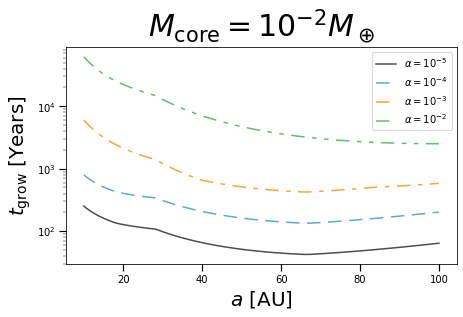

In [9]:
fig = plt.figure(1,figsize=(7,4))

style_arr = [None] * len(alpha_arr)
style_arr[0] = []

for i in range(len(alpha_arr)-1):
    style_add = [3,5] if i else [9,5]
    style_arr[i+1] = style_arr[i] + style_add

line_list = []

for i in range(len(alpha_arr)):
    line_list.append(plt.semilogy(a_au_arr,t_grow_arr[i],label=r'$\alpha = 10^{%.3g}$' %np.log10(alpha_arr[i])))
#     plt.loglog(r_arr,ke_arr[i],linestyle="dashed",color=line.get_color())

for i in range(len(alpha_arr)):
    line_list[i][0].set_dashes(style_arr[i])

# plt.loglog(r_arr,np.full(len(r_arr),1),linestyle='dashed')

plt.gca().legend(loc='best',fancybox=True)

# plt.title("$a = 1$ AU, $M_{core} = 10^{-1} M_\oplus$", y=1.02)
plt.xlabel(r"$a$ [AU]",fontsize=20)
plt.ylabel(r"$t_{\rm{grow}}$ [Years]",fontsize=20)

plt.title(r"$M_{\rm{core}} = 10^{%.3g} M_\oplus$" %np.log10(m_earths),y=1.02,fontsize=30)


# plt.axis([3e-2,1e3,5e1,5e6])

plt.tick_params(which='major', length=7,width=1.2)
plt.tick_params(which='minor', length=3.5,width=0.45)


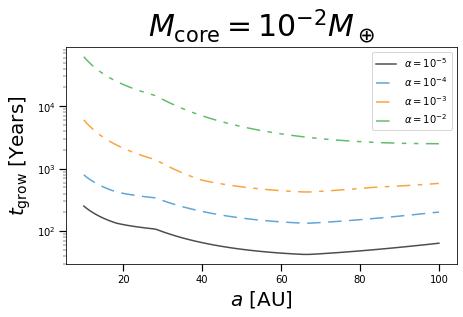

In [10]:
# Same thing, but now with my code
fig = plt.figure(1,figsize=(7,4))

style_arr = [None] * len(alpha_arr)
style_arr[0] = []

for i in range(len(alpha_arr)-1):
    style_add = [3,5] if i else [9,5]
    style_arr[i+1] = style_arr[i] + style_add

line_list = []

for i in range(len(alpha_arr)):
    line_list.append(plt.semilogy(a_au_arr,t_grow_arr_2[i],label=r'$\alpha = 10^{%.3g}$' %np.log10(alpha_arr[i])))
#     plt.loglog(r_arr,ke_arr[i],linestyle="dashed",color=line.get_color())

for i in range(len(alpha_arr)):
    line_list[i][0].set_dashes(style_arr[i])

# plt.loglog(r_arr,np.full(len(r_arr),1),linestyle='dashed')

plt.gca().legend(loc='best',fancybox=True)

# plt.title("$a = 1$ AU, $M_{core} = 10^{-1} M_\oplus$", y=1.02)
plt.xlabel(r"$a$ [AU]",fontsize=20)
plt.ylabel(r"$t_{\rm{grow}}$ [Years]",fontsize=20)

plt.title(r"$M_{\rm{core}} = 10^{%.3g} M_\oplus$" %np.log10(m_earths),y=1.02,fontsize=30)


# plt.axis([3e-2,1e3,5e1,5e6])

plt.tick_params(which='major', length=7,width=1.2)
plt.tick_params(which='minor', length=3.5,width=0.45)


In [11]:
T_0 = 14.9265380168

m_arr = np.logspace(-26,2,num=len(a_au_arr))

a_guess = 20.
index = np.where(a_au_arr<a_guess)[0][-1]
a_au = a_au_arr[index]
#a_au = 1

alpha_arr = [1e-5,1e-4,1e-3,1e-2]
t_grow_arr = np.zeros((len(alpha_arr),len(m_arr)))
st_arr = np.zeros((len(alpha_arr),len(m_arr)))

for i,alpha in enumerate(alpha_arr):
    for j,m_earths in enumerate(m_arr):
        sig_gas = disk_sigma(r=a_au,sigma0=sig_0,rcrit=r_crit)
        sig_p = gas_to_dust[i+1,index]*sig_gas
        temp = T_0*a_au**(-3./7.)
        s = s_arr[1,index]*1e-1 # Sizes given in mm, convert to cm
        t_grow_arr[i,j],st_arr[i,j] = TvsR_sng(alph=alpha,a_au=a_au,m_suns=m_star,r=s,m_earths=m_earths,temp_in=temp,\
                                   sig_g_in=sig_gas,sig_p_in=sig_p,out='st')

In [12]:
T_0 = 14.9265380168

m_arr = np.logspace(-26,2,num=len(a_au_arr))

a_guess = 20.
index = np.where(a_au_arr<a_guess)[0][-1]
a_au = a_au_arr[index]
#a_au = 1

alpha_arr = [1e-5,1e-4,1e-3,1e-2]
t_stop_arr = np.zeros((len(alpha_arr),len(m_arr)))
t_grow_arr_2 = np.zeros((len(alpha_arr),len(m_arr)))
st_arr_2 = np.zeros((len(alpha_arr),len(m_arr)))
v_c_g_arr = np.zeros((len(alpha_arr),len(m_arr)))
v_obj_core_arr = np.zeros((len(alpha_arr),len(m_arr)))
v_obj_arr = np.zeros((len(alpha_arr),len(m_arr)))
v_inf_arr = np.zeros((len(alpha_arr),len(m_arr)))
v_cross_arr = np.zeros((len(alpha_arr),len(m_arr)))
v_obj_phi_arr = np.zeros((len(alpha_arr),len(m_arr)))
v_core_phi_arr = np.zeros((len(alpha_arr),len(m_arr)))
v_phi_lam_arr = np.zeros((len(alpha_arr),len(m_arr)))
v_phi_lam_core_arr = np.zeros((len(alpha_arr),len(m_arr)))
w_enc_arr = np.zeros((len(alpha_arr),len(m_arr)))
m_obj_arr = np.zeros((len(alpha_arr),len(m_arr)))
for i,alpha in enumerate(alpha_arr):
    for j,m_earths in enumerate(m_arr):
        sig_gas = disk_sigma(r=a_au,sigma0=sig_0,rcrit=r_crit)
        sig_p = gas_to_dust[i+1,index]*sig_gas
        temp = T_0*a_au**(-3./7.)
        s = s_arr[1,index]*1e-1 # Sizes given in mm, convert to cm
        core = Core(a_core_au=a_au, m_core_earthmasses=m_earths, alpha=alpha, m_star_solarmasses=m_star, temp_in = temp,
                sig_p_in=sig_p, sig_g_in=sig_gas)
        core.main(s)
        eta = core.eta
        t_stop_arr[i,j] = core.t_s_core
        t_grow_arr_2[i,j] = core.t_acc
        v_c_g_arr[i,j] = core.v_core_gas
        st_arr_2[i,j] = core.stl
        #v_obj_arr[i,j] = core.v_obj
        v_obj_core_arr[i,j] = core.v_obj_core
        v_inf_arr[i,j] = core.v_inf
        v_cross_arr[i,j] = core.v_cross
        v_obj_phi_arr[i,j] = core.v_obj_phi
        v_core_phi_arr[i,j] = core.v_core_phi
        v_phi_lam_arr[i,j] = core.v_phi_lam
        v_phi_lam_core_arr[i,j] = core.v_phi_lam_core
        w_enc_arr[i,j] = core.work_enc
        m_obj_arr[i,j] = core.m_obj

This is the intermediate regime. Don't use it!
This is the intermediate regime. Don't use it!
This is the intermediate regime. Don't use it!
This is the intermediate regime. Don't use it!
This is the intermediate regime. Don't use it!
This is the intermediate regime. Don't use it!
This is the intermediate regime. Don't use it!
This is the intermediate regime. Don't use it!
This is the intermediate regime. Don't use it!
This is the intermediate regime. Don't use it!
This is the intermediate regime. Don't use it!
This is the intermediate regime. Don't use it!
This is the intermediate regime. Don't use it!
This is the intermediate regime. Don't use it!
This is the intermediate regime. Don't use it!
This is the intermediate regime. Don't use it!
This is the intermediate regime. Don't use it!
This is the intermediate regime. Don't use it!
This is the intermediate regime. Don't use it!
This is the intermediate regime. Don't use it!
This is the intermediate regime. Don't use it!
This is the i

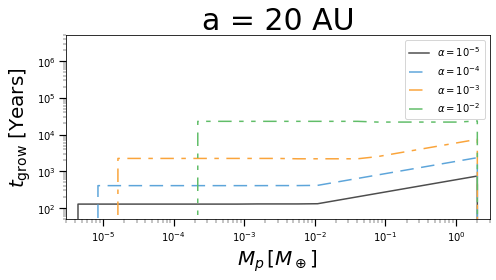

In [13]:
fig = plt.figure(1,figsize=(7,4))

style_arr = [None] * len(alpha_arr)
style_arr[0] = []

for i in range(len(alpha_arr)-1):
    style_add = [3,5] if i else [9,5]
    style_arr[i+1] = style_arr[i] + style_add

line_list = []

for i in range(len(alpha_arr)):
    line_list.append(plt.loglog(m_arr,t_grow_arr[i],label=r'$\alpha = 10^{%.3g}$' %np.log10(alpha_arr[i])))
#     plt.loglog(r_arr,ke_arr[i],linestyle="dashed",color=line.get_color())

for i in range(len(alpha_arr)):
    line_list[i][0].set_dashes(style_arr[i])

# plt.loglog(r_arr,np.full(len(r_arr),1),linestyle='dashed')

plt.gca().legend(loc='best',fancybox=True)

# plt.title("$a = 1$ AU, $M_{core} = 10^{-1} M_\oplus$", y=1.02)
plt.xlabel(r"$M_p \, [M_\oplus]$",fontsize=20)
plt.ylabel(r"$t_{\rm{grow}}$ [Years]",fontsize=20)

plt.title('a = 20 AU',fontsize=30)


plt.axis([3e-6,3e0,5e1,5e6])

plt.tick_params(which='major', length=7,width=1.2)
plt.tick_params(which='minor', length=3.5,width=0.45)

plt.tight_layout()

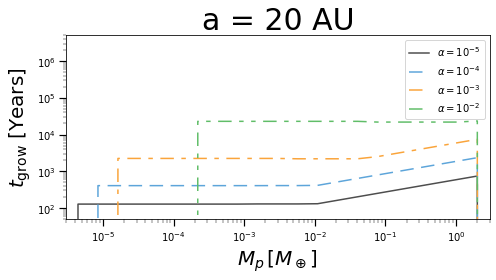

In [14]:
# Now for my code:
fig = plt.figure(1,figsize=(7,4))

style_arr = [None] * len(alpha_arr)
style_arr[0] = []

for i in range(len(alpha_arr)-1):
    style_add = [3,5] if i else [9,5]
    style_arr[i+1] = style_arr[i] + style_add

line_list = []

for i in range(len(alpha_arr)):
    line_list.append(plt.loglog(m_arr,t_grow_arr_2[i],label=r'$\alpha = 10^{%.3g}$' %np.log10(alpha_arr[i])))
#     plt.loglog(r_arr,ke_arr[i],linestyle="dashed",color=line.get_color())

for i in range(len(alpha_arr)):
    line_list[i][0].set_dashes(style_arr[i])

# plt.loglog(r_arr,np.full(len(r_arr),1),linestyle='dashed')

plt.gca().legend(loc='best',fancybox=True)

# plt.title("$a = 1$ AU, $M_{core} = 10^{-1} M_\oplus$", y=1.02)
plt.xlabel(r"$M_p \, [M_\oplus]$",fontsize=20)
plt.ylabel(r"$t_{\rm{grow}}$ [Years]",fontsize=20)

plt.title('a = 20 AU',fontsize=30)


plt.axis([3e-6,3e0,5e1,5e6])

plt.tick_params(which='major', length=7,width=1.2)
plt.tick_params(which='minor', length=3.5,width=0.45)

plt.tight_layout()

In [15]:
# Try to make color map, with x-axis showing a (AU), y-axis showing M_core (M_earth), and color showing t_acc
gas_to_dust = np.loadtxt("star1_age1_sigma1_rcrit1_fd_parsed.txt").T
s_arr = np.loadtxt("star1_age1_sigma1_rcrit1_sizes.txt").T
a_au_arr = gas_to_dust[0]
m_core_arr = np.logspace(-10, 2, 1000)
T_0 = 14.9265380168
m_star = 0.1
sig_0 = 500.
r_crit = 30.
alpha_arr = [1e-5,1e-4,1e-3,1e-2]
alpha = 1e-4

t_grow_arr_cb = np.zeros((len(m_core_arr), len(a_au_arr)))
st_arr_cb = np.zeros((len(m_core_arr), len(a_au_arr)))
rate_arr_cb = np.zeros((len(m_core_arr), len(a_au_arr)))

for i, m_c in enumerate(m_core_arr):
    for j, a_au in enumerate(a_au_arr):
        sig_gas = disk_sigma(r=a_au,sigma0=sig_0,rcrit=r_crit)
        sig_p = gas_to_dust[1+1,j]*sig_gas
        temp = T_0*a_au**(-3./7.)
        s = s_arr[1,j]*1e-1
        core = Core(a_core_au=a_au, m_core_earthmasses=m_c, alpha=alpha, m_star_solarmasses=m_star, temp_in=temp,
                sig_p_in=sig_p, sig_g_in=sig_gas)
        core.main(s)
        t_grow_arr_cb[i,j] = core.t_acc
        st_arr_cb[i,j] = core.stl
        rate_arr_cb[i,j] = m_c/(t_grow_arr_cb[i,j]/fn.sec_to_years)

/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:28: RuntimeWarning: divide by zero encountered in double_scalars


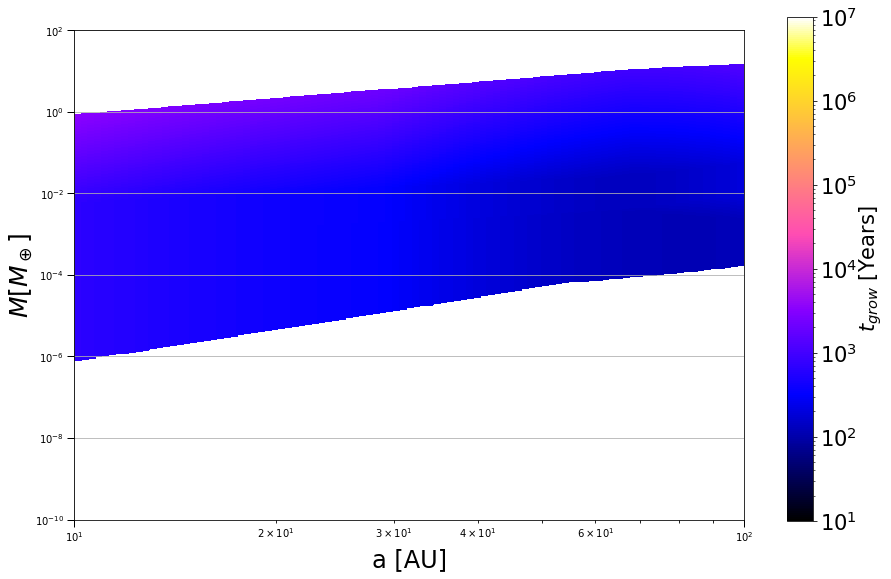

In [16]:
fig = plt.figure(1,figsize=(12,9))
cmap = 'gnuplot2'

X, Y = np.meshgrid(a_au_arr, m_core_arr)
im = plt.pcolormesh(X,Y,t_grow_arr_cb, cmap=cmap,norm=LogNorm(),vmin=1e1,vmax=1e7)
#T = T_0*np.power(a_au_arr,-3./7.)
#c_s = np.sqrt(fn.k*T/fn.mu)
#om = np.sqrt(fn.G*fn.m_sun/(a_au_arr*fn.au)**3.)
#vk = a_au_arr*fn.au*om
#eta = c_s**2./2./vk**2.
#plt.plot(s_array, 3* (eta/st_array)**3 *3.3e5, 'k')
#plt.plot(s_array, 192* (eta/st_array)**3 *3.3e5, 'k')
    
im.set_edgecolor('face')
ax = plt.gca()
ax.tick_params(which='major', length=7,width=1.0)
ax.tick_params(which='minor', length=3.0,width=0.85)
ax.grid()
        
ax.set_xlabel('a [AU]',fontsize=24)
ax.set_ylabel(r'$M \left[ M_\oplus \right]$',fontsize=25,labelpad=0.03)
        
ax.set_ylim(1e-10,1e2)
ax.set_xscale('log')
ax.set_yscale('log')

cax = fig.add_axes([0.95, 0.123, 0.03, 0.778])
cb = fig.colorbar(im, cax=cax,cmap=cmap,norm=LogNorm())
cb.set_label(label=r'$t_{grow}$ [Years]',fontsize=21,labelpad=0.1)
cb.ax.tick_params(labelsize=21)

In [17]:
def rate_odeint(m,t,p):
    alph,a_au,m_suns,temp,sig_gas,sig_p,st,verbose,verb_t = p
    cs = fn.sound_speed(temp)
    vth = fn.therm_vel(cs)
    om = fn.omega(m_suns*fn.m_sun, a_au*fn.au)
    H_g = cs/om
    rho_g = sig_gas/2./H_g
    rho_s = 2.
    vk = a_au*fn.au*om
    v0 = cs**2./2./vk
    m_earths = m/fn.m_earth
    s = st_solver(st=st,alph=alph,a_au=a_au,sig_in=sig_gas,temp_in=temp,m_earths=m_earths)
    
    rp = (3*m/4./np.pi/rho_s)**(1./3.)
    v_esc = np.sqrt(2*fn.G*m/rp)

    H_turb = np.sqrt(alph/(alph+st))*H_g
    H_KH = 2*v0/om
    H_p = max(H_turb,H_KH)
    rho_solid = sig_p/2./H_p
    v_turb = np.sqrt(alph)*cs/np.sqrt(1 + st)
    v_lam = v0*np.sqrt(1 + 4.*st**2.)/(1 + st**2.)
    v_inf = max(v_turb,v_lam)
    bGF = rp*(1 + (v_esc/v_inf)**2.)**(0.5)
    H_acc = min(H_p,bGF)
    sig_acc = 4*bGF*H_acc
    rate_GF = rho_solid*sig_acc*v_inf

    core = Core(a_core_au=a_au, m_core_earthmasses=m_earths, alpha=alph, m_star_solarmasses=m_suns, temp_in=temp,
                sig_p_in=sig_p, sig_g_in=sig_gas)
    core.main(s)
    rate_peb = m/(core.t_acc/fn.sec_to_years)
    r_ws = core.r_ws
    h_r = core.r_hill
    b_r = core.r_bondi
    b_shear = core.r_sh
    r_tmp = min(r_ws,b_shear)
    r_stab = min(r_tmp,h_r)
    if bGF > r_stab:
        rate = rate_GF
    else:
        rate = rate_peb
#     rate = rate_peb + rate_GF
    print(rate_peb, rate_GF)
    return rate

In [98]:
a_au = a_au_arr[30]
M_dot = 1e-7 # Not sure how Mickey chose this
m_star = 0.1
L_star = 0.23 * (m_star**2.3)

sig_gas = disk_sigma(r=a_au, sigma0=500., rcrit = 30.)

T_visc = 233.*(M_dot/1e-8)**(1./4.)*m_star**(1./4.)*(a_au)**(-1.)*(sig_0/3000)**(1./4.) #From flow_iso_scratch notebook
T_irr = 150.*(L_star)**(2./7.)*m_star**(-1./7.)*a_au**(-3./7.)
T = max(T_visc,T_irr)

sig_p = 5.*a_au**(-1.)

a_cgs = a_au*fn.au
m_star_cgs = m_star*fn.m_sun

c_s = np.sqrt(fn.k*T/fn.mu)
om = np.sqrt(fn.G*m_star_cgs/a_cgs**3.)
vk = a_cgs*om
v_lam = c_s**2./2./vk
H = c_s/om

alpha = 1e-4 #(M_dot*fn.m_sun/3.154e7)/(3*np.pi*sig_gas*c_s*H)

v_turb = np.sqrt(alpha)*c_s

v_gas = np.sqrt(v_lam**2. + v_turb**2.)
aspect = H/a_cgs

rho_g = sig_gas/2./H

mfp = fn.mu/rho_g/fn.cross

In [99]:
print(a_au_arr[30])
print(m_core_arr[250], m_core_arr[333], m_core_arr[417], m_core_arr[500])
print(m_core_arr[583], m_core_arr[666], m_core_arr[750])
print(st_arr_cb[250,30], st_arr_cb[333,30], st_arr_cb[417,30], st_arr_cb[500,30])
print(st_arr_cb[583,30], st_arr_cb[660,30], st_arr_cb[750,30])

20.09233002565047
1.0069386314760271e-07 1e-06 1.0209606623060476e-05 0.00010139254075588143
0.001006938631476027 0.01 0.10209606623060476
0.129046294644333 0.129046294644333 0.129046294644333 0.129046294644333
0.129046294644333 0.129046294644333 0.129046294644333


In [100]:
m0_arr = np.multiply([1e-1,1e-2,1e-3,1e-4,1e-5,1e-6,1e-7],fn.m_earth)
times = np.logspace(3,6.5,num=1e5)/fn.sec_to_years

m_arr = np.zeros((len(m0_arr),len(times)))
st = st_arr_cb[250,30]

for i,m0 in enumerate(m0_arr):
    p = [alpha,a_au,m_star,T,sig_gas,sig_p,st,1,0]
    wsol = odeint(rate_odeint,m0,times,args=(p,))
    m_arr[i] = wsol.flatten()

[1.67143474e+15] [1.16574456e+13]
[1.67144266e+15] [1.16575562e+13]
[1.67144266e+15] [1.16575562e+13]
[1.67145059e+15] [1.16576667e+13]
[1.67145059e+15] [1.16576667e+13]
[1.67885223e+15] [1.17611418e+13]
[1.67885225e+15] [1.17611421e+13]
[1.68627022e+15] [1.18653043e+13]
[1.68627026e+15] [1.18653048e+13]
[1.69370458e+15] [1.19701573e+13]
[1.69370462e+15] [1.19701578e+13]
[1.76894577e+15] [1.30573043e+13]
[1.7689472e+15] [1.30573254e+13]
[1.72984849e+15] [1.24864978e+13]
[1.72984883e+15] [1.24865028e+13]
[1.70090293e+15] [1.20721212e+13]
[1.70090294e+15] [1.20721214e+13]
[1.70811655e+15] [1.21747353e+13]
[1.70811654e+15] [1.21747351e+13]
[1.71534539e+15] [1.22780015e+13]
[1.71534539e+15] [1.22780015e+13]
[1.72258952e+15] [1.23819235e+13]
[1.72258952e+15] [1.23819235e+13]
[1.73712355e+15] [1.25917451e+13]
[1.73712355e+15] [1.25917451e+13]
[1.75171865e+15] [1.28042223e+13]
[1.75171865e+15] [1.28042223e+13]
[1.7663748e+15] [1.30193772e+13]
[1.78109201e+15] [1.32372322e+13]
[1.93162221e+15]

/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:32: RuntimeWarning: divide by zero encountered in true_divide
/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: RuntimeWarning: invalid value encountered in true_divide
  from ipykernel import kernelapp as app


 [2.68436147e+10]
[1.97610827e+13] [2.72983539e+10]
[1.97610829e+13] [2.72983543e+10]
[2.02653551e+13] [2.82310726e+10]
[2.02653561e+13] [2.82310745e+10]
[2.07824979e+13] [2.91956647e+10]
[2.07824975e+13] [2.91956639e+10]
[2.13128361e+13] [3.01932124e+10]
[2.13128357e+13] [3.01932116e+10]
[2.18567072e+13] [3.12248435e+10]
[2.18567072e+13] [3.12248436e+10]
[2.24144575e+13] [3.22917244e+10]
[2.24144576e+13] [3.22917246e+10]
[2.38654179e+13] [3.51084323e+10]
[2.38654193e+13] [3.5108435e+10]
[2.54103046e+13] [3.81708382e+10]
[2.54103062e+13] [3.81708413e+10]
[2.70552007e+13] [4.15003797e+10]
[2.70551989e+13] [4.1500376e+10]
[2.88065707e+13] [4.51203396e+10]
[2.88065708e+13] [4.51203399e+10]
[3.06713143e+13] [4.90560658e+10]
[3.06713149e+13] [4.9056067e+10]
[3.26567693e+13] [5.33350997e+10]
[3.26567699e+13] [5.33351009e+10]
[3.79039458e+13] [6.50568652e+10]
[3.79039589e+13] [6.50568953e+10]
[3.68439249e+13] [6.26424464e+10]
[3.68439307e+13] [6.26424595e+10]
[4.15679424e+13] [7.35740002e+10]

[1.87898682e+12] [1.18497552e+09]
[1.87898688e+12] [1.18497557e+09]
[1.91210813e+12] [1.21290382e+09]
[1.91210862e+12] [1.21290424e+09]
[1.90281001e+12] [1.20504713e+09]
[1.90281027e+12] [1.20504735e+09]
[1.92693599e+12] [1.22545937e+09]
[1.92693577e+12] [1.22545917e+09]
[1.95136712e+12] [1.24621675e+09]
[1.95136714e+12] [1.24621677e+09]
[1.97610826e+12] [1.26732598e+09]
[1.97610828e+12] [1.26732599e+09]
[2.02653551e+12] [1.31062316e+09]
[2.02653561e+12] [1.31062325e+09]
[2.0782498e+12] [1.35539985e+09]
[2.07824976e+12] [1.35539981e+09]
[2.13128362e+12] [1.40170627e+09]
[2.13128358e+12] [1.40170624e+09]
[2.18567074e+12] [1.44959478e+09]
[2.18567074e+12] [1.44959479e+09]
[2.24144578e+12] [1.49911952e+09]
[2.24144579e+12] [1.49911953e+09]
[2.38654183e+12] [1.62987107e+09]
[2.38654197e+12] [1.6298712e+09]
[2.54103051e+12] [1.77202741e+09]
[2.54103066e+12] [1.77202756e+09]
[2.70552013e+12] [1.92658361e+09]
[2.70551995e+12] [1.92658344e+09]
[2.88065714e+12] [2.09462037e+09]
[2.88065715e+12]

No handles with labels found to put in legend.
/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:18: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.


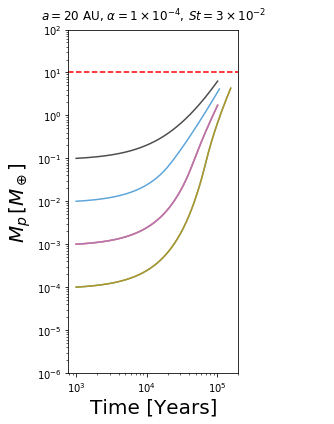

In [102]:
fig = plt.figure(figsize=(6,6))

# labels = [r'$M_0 = 10^{-7} M_\oplus$',r'$M_0 = 10^{-6} M_\oplus$',r'$M_0 = 10^{-5} M_\oplus$']

for i in range(len(m0_arr)):
    plt.loglog(times*fn.sec_to_years,m_arr[i]/fn.m_earth)
    
# plt.ylim([1e-8,1e2])
plt.xlabel('Time [Years]',fontsize=20)
plt.ylabel(r'$M_p \, [M_\oplus]$',fontsize=20)

plt.axhline(y=1e1,linestyle='dashed',color='r')

lgd = plt.gca().legend(bbox_to_anchor=[1.55,0.70],frameon=False)

plt.title(r'$a = 20$ AU, $\alpha = 1 \times 10^{-4}, \, St = 3 \times 10^{-2}$',y=1.01)
plt.ylim(1e-6,1e2)
plt.tight_layout()

## Debugging

In [15]:
print((1e-7 * fn.m_sun / 3)**(1/3), 'g')

404742168.5329239 g


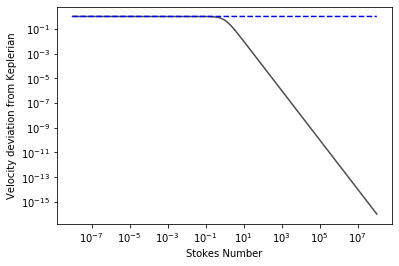

In [16]:
stokes_arr = np.logspace(-8,8,10000)
v_rel_arr = np.zeros(stokes_arr.shape)
om = np.sqrt((fn.G * m_star * fn.m_sun)/(a_au * fn.au)**3)
v_g_arr = eta*om*(a_au*fn.au)*np.ones(stokes_arr.shape)

for i, st in enumerate(stokes_arr):
    v_rel_arr[i] = eta*om*(a_au * fn.au) * 1/(1 + np.power(st,2))
    
plt.loglog(stokes_arr, v_rel_arr/(eta*om*(a_au*fn.au)))
plt.loglog(stokes_arr, v_g_arr/(eta*om*(a_au*fn.au)), 'b--')
plt.xlabel("Stokes Number")
plt.ylabel("Velocity deviation from Keplerian");

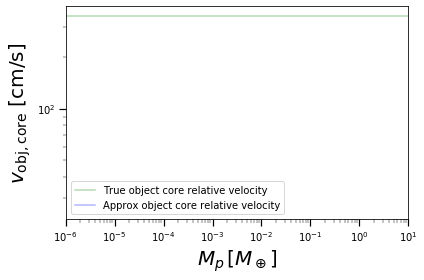

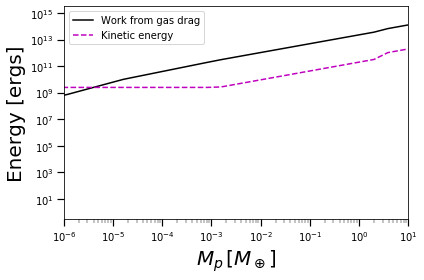

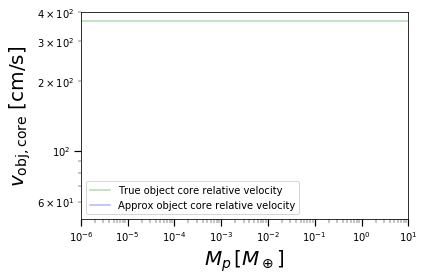

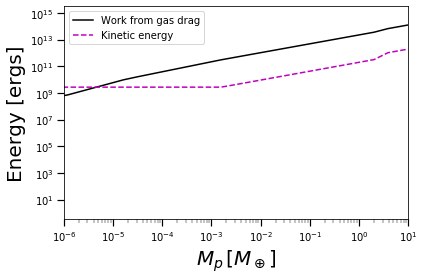

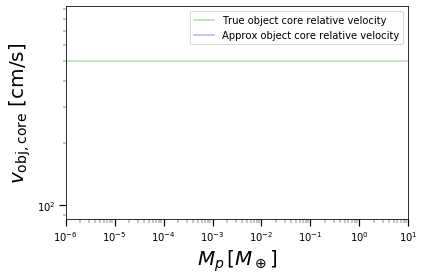

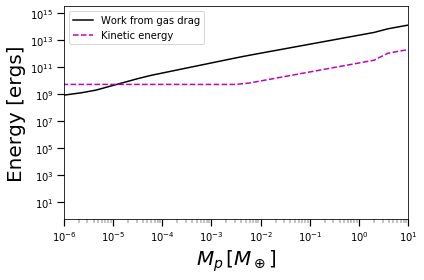

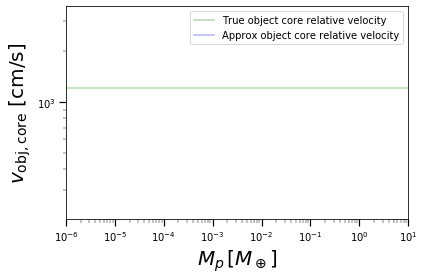

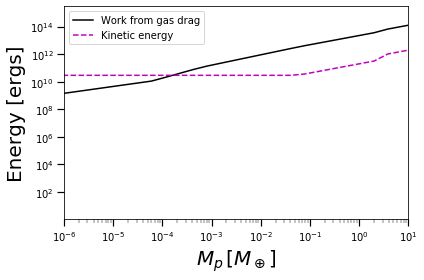

In [17]:
for i in range(len(alpha_arr)):
    # Check stopping time
    om = np.sqrt((fn.G * m_star * fn.m_sun)/(a_au * fn.au)**3)
    #plt.loglog(m_arr, t_stop_arr[i] * om, 'k-')
    st = t_stop_arr[i] * om
    #plt.loglog(m_arr, st)
    #print(eta*om*(a_au *fn.au) * (1/(1 + np.power(st,2))))
    #plt.loglog(m_arr, eta*om*(a_au * fn.au) * 1/(1 + np.power(st,2)), 'b-')
    #plt.loglog(m_arr, -v_core_phi_arr[i], 'r--')
    #plt.loglog(m_arr, v_c_g_arr[i], 'g--', label="Core gas velocity")
    #plt.loglog(m_arr, v_kep_arr[i], 'k-', label="Keplerian velocity")
    #plt.loglog(m_arr, v_phi_lam_arr[i], 'g--', label="Laminar object phi velocity")
    #plt.loglog(m_arr, v_phi_lam_core_arr[i], 'k--', label="Laminar core phi velocity")
    #plt.xlim(1e-6, 1e1)
    #plt.xlabel(r"$M_p \, [M_\oplus]$",fontsize=20)
    #plt.ylabel("Stokes number",fontsize=20) #r"$v_{\rm{core}}$ [s]",fontsize=20)
    #plt.tick_params(which='major', length=7,width=1.2)
    #plt.tick_params(which='minor', length=3.5,width=0.45)
    #plt.tight_layout()
    #plt.legend()
    #plt.show()
    
    # Compare approach velocities
    #plt.loglog(m_arr, -v_obj_phi_arr[i], 'k--', label="Particle phi velocity")
    #plt.loglog(m_arr, -v_core_phi_arr[i], 'b--', alpha=0.3, label="Core phi velocity")
    plt.loglog(m_arr, v_obj_core_arr[i], 'g', alpha=0.3, label='True object core relative velocity')
    plt.loglog(m_arr, v_obj_arr[i], 'b', alpha=0.3, label='Approx object core relative velocity')
    #plt.loglog(m_arr, v_inf_arr[i], 'r--', label='V_infinity')
    #plt.loglog(m_arr, v_cross_arr[i], 'm--', label='V_cross')
    
    plt.xlim(1e-6, 1e1)
    plt.xlabel(r"$M_p \, [M_\oplus]$",fontsize=20)
    plt.ylabel(r"$v_{\rm{obj, core}}$ [cm/s]",fontsize=20)
    plt.tick_params(which='major', length=7,width=1.2)
    plt.tick_params(which='minor', length=3.5,width=0.45)
    plt.tight_layout()
    plt.legend()
    plt.show()
    
    plt.loglog(m_arr, w_enc_arr[i], 'k-', label='Work from gas drag')
    plt.loglog(m_arr, 0.5*m_obj_arr[i,j]*np.power(v_inf_arr[i],2), 'm--', label='Kinetic energy')
    plt.xlim(1e-6, 1e1)
    plt.xlabel(r"$M_p \, [M_\oplus]$",fontsize=20)
    plt.ylabel("Energy [ergs]",fontsize=20)
    plt.tick_params(which='major', length=7,width=1.2)
    plt.tick_params(which='minor', length=3.5,width=0.45)
    plt.tight_layout()
    plt.legend()
    plt.show()

In [18]:
print((1e-10*fn.m_earth/(4 * np.pi))**(1/3))
print(10**-10, fn.m_earth)

362298.8105843964
1e-10 5.976e+27


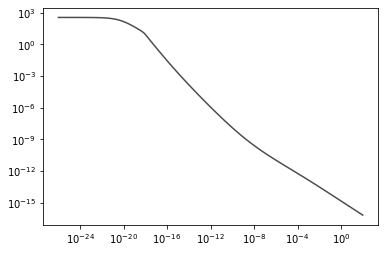

In [19]:
plt.loglog(m_arr, -v_core_phi_arr[-1])

## Mickey's old plots

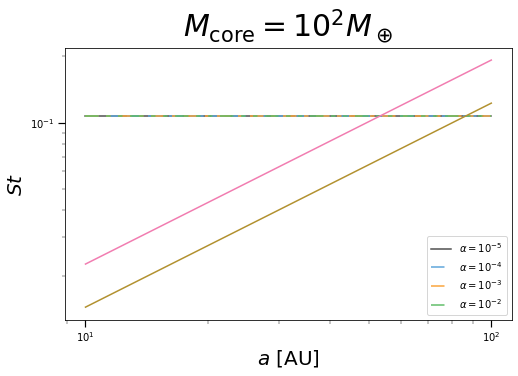

In [20]:
fig = plt.figure(1,figsize=(8,5))

style_arr = [None] * len(alpha_arr)
style_arr[0] = []

for i in range(len(alpha_arr)-1):
    style_add = [3,5] if i else [9,5]
    style_arr[i+1] = style_arr[i] + style_add

line_list = []

for i in range(len(alpha_arr)):
    line_list.append(plt.loglog(a_au_arr,st_arr[i],label=r'$\alpha = 10^{%.3g}$' %np.log10(alpha_arr[i])))
#     plt.loglog(r_arr,ke_arr[i],linestyle="dashed",color=line.get_color())

for i in range(len(alpha_arr)):
    line_list[i][0].set_dashes(style_arr[i])

# plt.loglog(r_arr,np.full(len(r_arr),1),linestyle='dashed')

plt.gca().legend(loc='best',fancybox=True)

# plt.title("$a = 1$ AU, $M_{core} = 10^{-1} M_\oplus$", y=1.02)
plt.xlabel(r"$a$ [AU]",fontsize=20)
plt.ylabel(r"$St$",fontsize=20)

plt.title(r"$M_{\rm{core}} = 10^{%.3g} M_\oplus$" %np.log10(m_earths),y=1.02,fontsize=30)


# plt.axis([3e-2,1e3,5e1,5e6])

plt.tick_params(which='major', length=7,width=1.2)
plt.tick_params(which='minor', length=3.5,width=0.45)

T_arr = T_0*a_au_arr**(-3./7.)
cs = np.sqrt(fn.k*T_arr/fn.mu)
om = np.sqrt(fn.G*m_star*fn.m_sun/(a_au_arr*fn.au)**3.)
vk = a_au_arr*fn.au*om
v_0 = cs**2./2./vk
t_disk = 1e6/fn.sec_to_years

plt.loglog(a_au_arr,(np.pi/2.)*a_au_arr*fn.au/t_disk/v_0)
# plt.loglog(a_au_arr,(np.pi/2.)*a_au_arr*fn.au/t_disk/v_0)
plt.loglog(a_au_arr,a_au_arr*fn.au/t_disk/v_0)
# (np.pi/2.)*a_au_arr*fn.au/t_disk/v_0/st_arr[0]

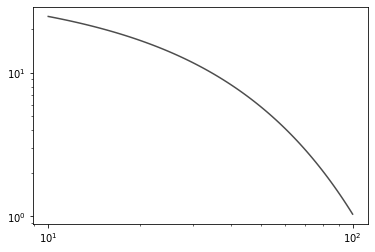

In [21]:
plt.loglog(s_arr[0],s_arr[1]*1e-1)

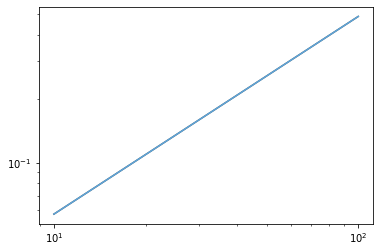

In [22]:
T_arr = T_0*a_au_arr**(-3./7.)
cs = np.sqrt(fn.k*T_arr/fn.mu)
om = np.sqrt(fn.G*m_star*fn.m_sun/(a_au_arr*fn.au)**3.)
vk = a_au_arr*fn.au*om
H = cs/om
sig_gas = disk_sigma(r=a_au_arr,sigma0=sig_0,rcrit=r_crit)
rho_g = sig_gas/2./H
rho_s = 2.
vth = np.sqrt(8./np.pi)*cs
plt.loglog(a_au_arr,s_arr[1,:]*1e-1/vth*rho_s/rho_g*om)
plt.loglog(a_au_arr,np.sqrt(np.pi/2)*s_arr[1,:]*1e-1/sig_gas*rho_s)
# plt.loglog(a_au_arr,s_arr[1,:])

In [23]:
H

array([7.02274640e+12, 7.23592404e+12, 7.45557275e+12, 7.68188896e+12,
       7.91507507e+12, 8.15533961e+12, 8.40289746e+12, 8.65797001e+12,
       8.92078536e+12, 9.19157855e+12, 9.47059175e+12, 9.75807449e+12,
       1.00542838e+13, 1.03594847e+13, 1.06739501e+13, 1.09979611e+13,
       1.13318076e+13, 1.16757882e+13, 1.20302103e+13, 1.23953911e+13,
       1.27716570e+13, 1.31593446e+13, 1.35588005e+13, 1.39703821e+13,
       1.43944574e+13, 1.48314056e+13, 1.52816175e+13, 1.57454957e+13,
       1.62234550e+13, 1.67159230e+13, 1.72233400e+13, 1.77461598e+13,
       1.82848500e+13, 1.88398923e+13, 1.94117830e+13, 2.00010337e+13,
       2.06081712e+13, 2.12337386e+13, 2.18782953e+13, 2.25424177e+13,
       2.32266997e+13, 2.39317534e+13, 2.46582091e+13, 2.54067167e+13,
       2.61779454e+13, 2.69725850e+13, 2.77913461e+13, 2.86349610e+13,
       2.95041841e+13, 3.03997927e+13, 3.13225878e+13, 3.22733946e+13,
       3.32530635e+13, 3.42624705e+13, 3.53025183e+13, 3.63741372e+13,
      

No handles with labels found to put in legend.


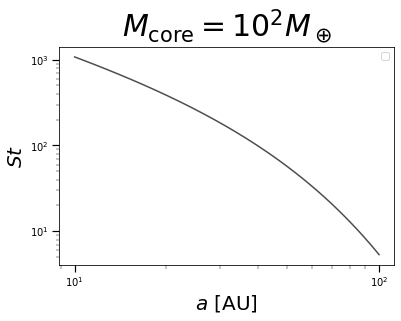

In [24]:
plt.loglog(a_au_arr,disk_sigma(a_au_arr,sigma0=sig_0,rcrit=r_crit))

# plt.loglog(r_arr,np.full(len(r_arr),1),linestyle='dashed')

plt.gca().legend(loc='best',fancybox=True)

# plt.title("$a = 1$ AU, $M_{core} = 10^{-1} M_\oplus$", y=1.02)
plt.xlabel(r"$a$ [AU]",fontsize=20)
plt.ylabel(r"$St$",fontsize=20)

plt.title(r"$M_{\rm{core}} = 10^{%.3g} M_\oplus$" %np.log10(m_earths),y=1.02,fontsize=30)


# plt.axis([3e-2,1e3,5e1,5e6])

plt.tick_params(which='major', length=7,width=1.2)
plt.tick_params(which='minor', length=3.5,width=0.45)


In [25]:
sig_gas

array([1074.79696586, 1041.88301309, 1009.79060403,  978.5018465 ,
        947.99926234,  918.26577719,  889.28471056,  861.03976609,
        833.51502193,  806.6949214 ,  780.56426377,  755.10819527,
        730.31220019,  706.16209224,  682.64400604,  659.74438873,
        637.44999181,  615.74786306,  594.6253387 ,  574.07003558,
        554.06984362,  534.61291836,  515.68767358,  497.28277418,
        479.38712907,  461.98988428,  445.08041616,  428.64832472,
        412.68342707,  397.17575103,  382.11552885,  367.49319098,
        353.29936012,  339.52484521,  326.16063569,  313.19789578,
        300.62795897,  288.44232254,  276.63264225,  265.1907272 ,
        254.10853472,  243.37816544,  232.9918585 ,  222.94198686,
        213.22105275,  203.82168325,  194.73662601,  185.95874512,
        177.48101709,  169.29652699,  161.39846475,  153.78012155,
        146.43488648,  139.35624317,  132.53776678,  125.97312098,
        119.6560552 ,  113.58040199,  107.74007458,  102.12906

## Make some heaptmaps

In [27]:
alpha = 1e-5
m_arr = np.logspace(-7,2,num=1000)
m_star = 0.1
T_0 = 14.9265380168

t_grow_arr = np.zeros((len(m_arr),len(a_au_arr)))

for i,M in enumerate(m_arr):
    for j,a_au in enumerate(a_au_arr):
        sig_gas = disk_sigma(r=a_au,sigma0=sig_0,rcrit=r_crit)
        sig_p = gas_to_dust[1,j]*sig_gas
        temp = T_0*a_au**(-3./7.)
        s = s_arr[1,j]*1e-1
        t_grow_arr[i,j],tmp = TvsR_sng(alph=alpha,a_au=a_au,m_suns=m_star,r=s,m_earths=M,temp_in=temp,\
                                   sig_g_in=sig_gas,sig_p_in=sig_p,out='st')
     

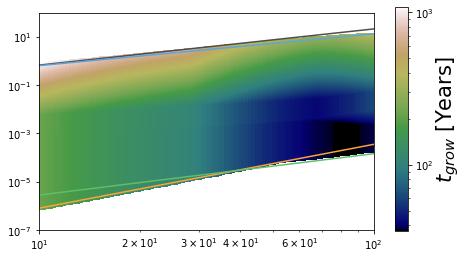

In [28]:
fig = plt.figure()
X, Y = np.meshgrid(a_au_arr,m_arr)
cmap = 'gist_earth'
im = plt.pcolormesh(X,Y,t_grow_arr, cmap=cmap,norm=LogNorm(),vmin=np.amin(t_grow_arr[np.where(t_grow_arr!=0)]),\
                                                                          vmax=np.amax(t_grow_arr))
plt.yscale('log')
plt.xscale('log')

msun_to_mearth = 3.003467e-6
T_arr = T_0*a_au_arr**(-3./7.)
cs = np.sqrt(fn.k*T_arr/fn.mu)
om = np.sqrt(fn.G*m_star*fn.m_sun/(a_au_arr*fn.au)**3.)
vk = a_au_arr*fn.au*om
v_0 = cs**2./2./vk
v_gas = v_0
t_disk = 1e6/fn.sec_to_years
m_upper = np.sqrt(np.pi/2.)*(t_disk*om)**(-1.)*m_star/msun_to_mearth
m_upper_2 = 2*(2.*np.pi)**(1./4.)*(v_0/vk)*(t_disk*om)**(-1./2.)*m_star/msun_to_mearth*(0.39570262)**(-1./3.)
m_lower = (0.39570262)*0.25*np.sqrt(np.pi/2.)*(v_0**2./(t_disk*(a_au_arr*fn.au)**2.*om**3.))/msun_to_mearth #Assumes v_0 = v_gas
m_lower_2 = 1./16.*v_gas**3./vk**3.*m_star/msun_to_mearth

plt.semilogy(a_au_arr,m_upper)
plt.semilogy(a_au_arr,m_upper_2)
plt.semilogy(a_au_arr,m_lower)
plt.semilogy(a_au_arr,m_lower_2)
# plt.loglog(a_au_arr,np.full(len(a_au_arr),1e1))
# plt.semilogy(a_au_arr,m_lower,linestyle=' ',marker='o')

cax = fig.add_axes([0.95, 0.123, 0.03, 0.778])
cb = fig.colorbar(im, cax=cax,cmap=cmap,norm=LogNorm())
cb.set_label(label=r'$t_{grow}$ [Years]',fontsize=21,labelpad=0.1)

# Try Generating My Own $St$ Values

In [29]:
alpha = 1e-2
m_arr = np.logspace(-7,2,num=1000)
m_star = 0.1
T_0 = 14.9265380168
t_disk = 1e6/fn.sec_to_years
t_grow_arr = np.zeros((len(m_arr),len(a_au_arr)))
s_arr = np.zeros(len(a_au_arr))

for i,M in enumerate(m_arr):
    for j,a_au in enumerate(a_au_arr):
        sig_gas = disk_sigma(r=a_au,sigma0=sig_0,rcrit=r_crit)
        sig_p = gas_to_dust[1,j]*sig_gas
        temp = T_0*a_au**(-3./7.)
#         s = s_arr[1,j]*1e-1
        cs = np.sqrt(fn.k*temp/fn.mu)
        vth = np.sqrt(8./np.pi)*cs
        om = np.sqrt(fn.G*m_star*fn.m_sun/(a_au*fn.au)**3.)
        H_g = cs/om
        rho_g = sig_gas/2./H_g
        rho_s = 2.
        vk = a_au*fn.au*om
        v0 = cs**2./2./vk
        st = np.sqrt(np.pi/2.)*a_au*fn.au/t_disk/v0
        s = st*rho_g*vth/rho_s/om
        s_arr[j] = s
        t_grow_arr[i,j],tmp = TvsR_sng(alph=alpha,a_au=a_au,m_suns=m_star,r=s,m_earths=M,temp_in=temp,\
                                   sig_g_in=sig_gas,sig_p_in=sig_p,out='st')
     

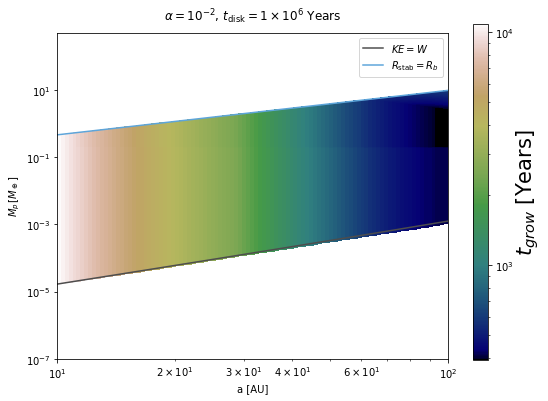

In [30]:
fig = plt.figure(figsize=(7,6))
X, Y = np.meshgrid(a_au_arr,m_arr)
cmap = 'gist_earth'
im = plt.pcolormesh(X,Y,t_grow_arr, cmap=cmap,norm=LogNorm(),vmin=np.amin(t_grow_arr[np.where(t_grow_arr!=0)]),\
                                                                          vmax=np.amax(t_grow_arr))
plt.yscale('log')
plt.xscale('log')

msun_to_mearth = 3.003467e-6
T_arr = T_0*a_au_arr**(-3./7.)
cs = np.sqrt(fn.k*T_arr/fn.mu)
om = np.sqrt(fn.G*m_star*fn.m_sun/(a_au_arr*fn.au)**3.)
vk = a_au_arr*fn.au*om
v_0 = cs**2./2./vk
v_gas = np.sqrt(v_0**2.+alpha*cs**2.)
t_disk = 1e6/fn.sec_to_years
m_upper = np.sqrt(np.pi/2.)*(t_disk*om)**(-1.)*m_star/msun_to_mearth
m_upper_2 = 2*(2.*np.pi)**(1./4.)*(v_0/vk)*(t_disk*om)**(-1./2.)*m_star/msun_to_mearth
m_lower = 0.25*np.sqrt(np.pi/2.)*(v_gas**3./(v_0*t_disk*(a_au_arr*fn.au)**2.*om**3.))*m_star/msun_to_mearth
m_lower_2 = 1./16.*v_gas**3./vk**3.*m_star/msun_to_mearth

m_low = np.minimum(m_lower,m_lower_2)
m_up = np.minimum(m_upper,m_upper_2,cs**3./3**(0.5)/fn.G/om/fn.m_earth)


# plt.semilogy(a_au_arr,m_upper)
# plt.semilogy(a_au_arr,m_upper_2)
# plt.semilogy(a_au_arr,cs**3./3**(0.5)/fn.G/om/fn.m_earth)
plt.semilogy(a_au_arr,m_low,label=r'$KE = W$') 
plt.semilogy(a_au_arr,m_up,label=r'$R_{\rm{stab}}=R_b$')

# plt.semilogy(a_au_arr,m_lower) 
# plt.semilogy(a_au_arr,m_lower_2)
# plt.loglog(a_au_arr,np.full(len(a_au_arr),1e1))
# plt.semilogy(a_au_arr,m_lower,linestyle=' ',marker='o')

plt.ylabel(r'$M_p \, [M_\oplus]$')
plt.xlabel('a [AU]')

plt.title(r'$\alpha = 10^{-2}, \, t_{\rm{disk}} = 1 \times 10^{6}$ Years',y=1.02)

plt.ylim([1e-7,5e2])

plt.gca().legend(loc='best')

cax = fig.add_axes([0.95, 0.123, 0.03, 0.778])
cb = fig.colorbar(im, cax=cax,cmap=cmap,norm=LogNorm())
cb.set_label(label=r'$t_{grow}$ [Years]',fontsize=21,labelpad=0.1)

# plt.tight_layout()

# Try Higher $\alpha$ Values

In [31]:
alpha = 1e-2
m_arr = np.logspace(-7,2,num=500)
m_star = 0.1
T_0 = 14.9265380168
t_disk = 1e6/fn.sec_to_years
t_grow_arr = np.zeros((len(m_arr),len(a_au_arr)))
s_arr = np.zeros(len(a_au_arr))

for i,M in enumerate(m_arr):
    for j,a_au in enumerate(a_au_arr):
        sig_gas = disk_sigma(r=a_au,sigma0=sig_0,rcrit=r_crit)
        sig_p = gas_to_dust[-1,j]*sig_gas
        temp = T_0*a_au**(-3./7.)
#         s = s_arr[1,j]*1e-1
        cs = np.sqrt(fn.k*temp/fn.mu)
        vth = np.sqrt(8./np.pi)*cs
        om = np.sqrt(fn.G*m_star*fn.m_sun/(a_au*fn.au)**3.)
        H_g = cs/om
        rho_g = sig_gas/2./H_g
        rho_s = 2.
        vk = a_au*fn.au*om
        v0 = cs**2./2./vk
        st = np.sqrt(np.pi/2.)*a_au*fn.au/t_disk/v0
        s = st*rho_g*vth/rho_s/om
        s_arr[j] = s
        t_grow_arr[i,j],tmp = TvsR_sng(alph=alpha,a_au=a_au,m_suns=m_star,r=s,m_earths=M,temp_in=temp,\
                                   sig_g_in=sig_gas,sig_p_in=sig_p,out='st')
     

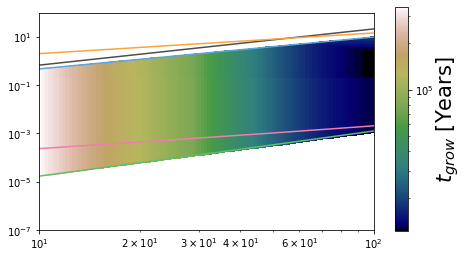

In [32]:
fig = plt.figure()
X, Y = np.meshgrid(a_au_arr,m_arr)
cmap = 'gist_earth'
im = plt.pcolormesh(X,Y,t_grow_arr, cmap=cmap,norm=LogNorm(),vmin=np.amin(t_grow_arr[np.where(t_grow_arr!=0)]),\
                                                                          vmax=np.amax(t_grow_arr))
plt.yscale('log')
plt.xscale('log')

msun_to_mearth = 3.003467e-6
T_arr = T_0*a_au_arr**(-3./7.)
cs = np.sqrt(fn.k*T_arr/fn.mu)
om = np.sqrt(fn.G*m_star*fn.m_sun/(a_au_arr*fn.au)**3.)
vk = a_au_arr*fn.au*om
v_0 = cs**2./2./vk
v_gas = np.sqrt(v_0**2. + alpha*cs**2.)
t_disk = 1e6/fn.sec_to_years
m_upper = np.sqrt(np.pi/2.)*(t_disk*om)**(-1.)*m_star/msun_to_mearth
m_upper_2 = 2*(2.*np.pi)**(1./4.)*(v_0/vk)*(t_disk*om)**(-1./2.)*m_star/msun_to_mearth
m_lower = 0.25*np.sqrt(np.pi/2.)*(v_gas**3./(v_0*t_disk*(a_au_arr*fn.au)**2.*om**3.))*m_star/msun_to_mearth
m_lower_2 = 1./16.*v_gas**3./vk**3.*m_star/msun_to_mearth

plt.semilogy(a_au_arr,m_upper)
plt.semilogy(a_au_arr,m_upper_2)
plt.semilogy(a_au_arr,cs**3./3**(0.5)/fn.G/om/fn.m_earth)
plt.semilogy(a_au_arr,m_lower) 
plt.semilogy(a_au_arr,m_lower_2)
# plt.loglog(a_au_arr,np.full(len(a_au_arr),1e1))
# plt.semilogy(a_au_arr,m_lower,linestyle=' ',marker='o')

cax = fig.add_axes([0.95, 0.123, 0.03, 0.778])
cb = fig.colorbar(im, cax=cax,cmap=cmap,norm=LogNorm())
cb.set_label(label=r'$t_{grow}$ [Years]',fontsize=21,labelpad=0.1)

In [33]:
s_arr

array([7.76213487, 7.68870538, 7.61456498, 7.53971501, 7.46415741,
       7.38789473, 7.31093015, 7.23326752, 7.15491138, 7.07586698,
       6.99614031, 6.91573813, 6.83466797, 6.7529382 , 6.67055801,
       6.58753747, 6.50388753, 6.41962006, 6.33474786, 6.24928469,
       6.16324531, 6.07664546, 5.98950194, 5.90183256, 5.81365623,
       5.72499292, 5.63586371, 5.5462908 , 5.45629753, 5.36590835,
       5.27514889, 5.18404593, 5.09262742, 5.00092248, 4.90896139,
       4.81677563, 4.7243978 , 4.6318617 , 4.53920225, 4.44645553,
       4.3536587 , 4.26085005, 4.16806893, 4.07535573, 3.98275186,
       3.89029969, 3.79804255, 3.70602462, 3.61429096, 3.52288739,
       3.43186046, 3.34125738, 3.25112596, 3.16151451, 3.07247182,
       2.98404699, 2.89628943, 2.8092487 , 2.72297446, 2.63751635,
       2.55292386, 2.46924627, 2.3865325 , 2.304831  , 2.22418965,
       2.1446556 , 2.06627518, 1.98909374, 1.91315556, 1.83850369,
       1.76517981, 1.69322414, 1.62267527, 1.55357005, 1.48594

In [34]:
a = 12.
ind_a = np.where(a_au_arr<a)[0][-1]
print(ind_a)
ind_b = np.where(t_grow_arr[:,ind_a]>0)[0][0]
print(ind_b)
print(m_arr[ind_b])

7
130
2.2115123997254888e-05


In [35]:
i = 300
j = 10
a_au = a_au_arr[j]
M = m_arr[i]
print(a_au)
print(M)
print(t_grow_arr[i,j])
print(TvsR_sng)
sig_gas = disk_sigma(r=a_au,sigma0=sig_0,rcrit=r_crit)
sig_p = gas_to_dust[1,j]*sig_gas
temp = T_0*a_au**(-3./7.)
s = s_arr[j]*1e-1 #s_arr[1,j]*1e-1
TvsR_sng(alph=alpha,a_au=a_au,m_suns=m_star,r=s,m_earths=M,temp_in=temp,\
                                   sig_g_in=sig_gas,sig_p_in=sig_p,out='st')

12.618568830660204
0.02575263326771204
234965.09220988798
<function TvsR_sng at 0xb231581e0>


(110333.8476154546, 0.002246672558773844)

In [36]:
alpha = 1e-5
m_star = 0.1
M = 1e-4
ind = np.where(a_au_arr<80)[0][-1]
a_tst = a_au_arr[ind]
s_tst = s_arr[ind]*1e-1
print(a_tst)
print(s_tst)
sig_gas_tst = disk_sigma(r=a_tst,sigma0=sig_0,rcrit=r_crit)
sig_p_tst = gas_to_dust[1,ind]*sig_gas_tst
temp = T_0*a_tst**(-3./7.)
print('sig_gas = %.5f' %sig_gas_tst)
print('T = %.5f' %temp)
print('sig_p = %.5f' %sig_p_tst)
print(TvsR_sng(alph=alpha,a_au=a_tst,m_suns=m_star,r=s_tst,m_earths=M,temp_in=temp,\
                                   sig_g_in=sig_gas_tst,sig_p_in=sig_p_tst,out='st'))

79.24828983539177
0.06657266587904163
sig_gas = 13.48543
T = 2.29143
sig_p = 11.34035
(1287.5544198132536, 0.012374310856295478)


In [37]:
alpha = 1e-5
m_arr = np.logspace(-5,1,num=100)
m_star = 0.1
T_0 = 14.9265380168

en_arr = np.zeros((len(m_arr),len(a_au_arr)))

for i,M in enumerate(m_arr):
    for j,a_au in enumerate(a_au_arr):
        sig_gas = disk_sigma(r=a_au,sigma0=sig_0,rcrit=r_crit)
        sig_p = gas_to_dust[1,j]*sig_gas
        temp = T_0*a_au**(-3./7.)
        s = s_arr[j]*1e-1
        work_enc,ke = TvsR_sng(alph=alpha,a_au=a_au,m_suns=m_star,r=s,m_earths=M,temp_in=temp,\
                                   sig_g_in=sig_gas,sig_p_in=sig_p,out='en')
        en_arr[i,j] = ke/work_enc

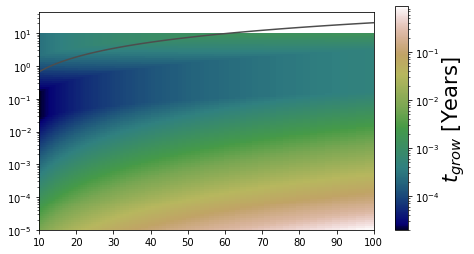

In [38]:
fig = plt.figure()
X, Y = np.meshgrid(a_au_arr,m_arr)
cmap = 'gist_earth'
im = plt.pcolormesh(X,Y,en_arr, cmap=cmap,norm=LogNorm(),vmin=np.amin(en_arr[np.where(en_arr!=0)]),\
                                                                          vmax=np.amax(en_arr))
plt.yscale('log')

msun_to_mearth = 3.003467e-6
T_arr = T_0*a_au_arr**(-3./7.)
cs = np.sqrt(fn.k*T_arr/fn.mu)
om = np.sqrt(fn.G*m_star*fn.m_sun/(a_au_arr*fn.au)**3.)
vk = a_au_arr*fn.au*om
v_0 = cs**2./2./vk
t_disk = 1e6/fn.sec_to_years
m_lim = np.sqrt(np.pi/2.)*(t_disk*om)**(-1.)*m_star/msun_to_mearth

plt.semilogy(a_au_arr,m_lim)

cax = fig.add_axes([0.95, 0.123, 0.03, 0.778])
cb = fig.colorbar(im, cax=cax,cmap=cmap,norm=LogNorm())
cb.set_label(label=r'$t_{grow}$ [Years]',fontsize=21,labelpad=0.1)



# Plot Dust to Gas Ratio over time

In [39]:
#Disk surface density parameters
m_star = 0.1
sig_0 = 500.
r_crit = 30.

def disk_sigma(r=1., sigma0=500., rcrit=100.):
    r_c = rcrit
    gamma = 1.
    sigma = sigma0*((r/r_c)**(-gamma))*np.exp(-(r/r_c)**(2-gamma))
    return sigma

In [40]:
#Read in parameters from Diana

gas_to_dust = np.loadtxt("star1_age1_sigma1_rcrit1_fd_parsed.txt").T
s_arr = np.loadtxt("star1_age1_sigma1_rcrit1_sizes.txt").T
a_au_arr = gas_to_dust[0]
alpha_arr = [1e-5,1e-4,1e-3,1e-2]
t_grow_arr = np.zeros((len(alpha_arr),len(a_au_arr)))
st_arr = np.zeros((len(alpha_arr),len(a_au_arr)))

(10.0, 100.0)

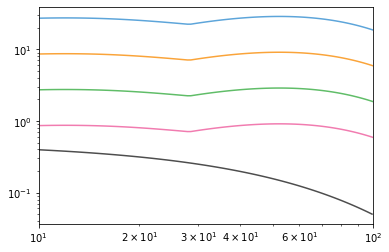

In [41]:
m_earths = 1e-2
T_0 = 14.9265380168

plt.loglog(500*a_au_arr**(-1.)*1e-2)

for i,alpha in enumerate(alpha_arr):
    sig_gas = disk_sigma(r=a_au_arr,sigma0=sig_0,rcrit=r_crit)
    sig_p = gas_to_dust[i+1]*sig_gas*(10.)**(1./3.)
    plt.loglog(a_au_arr,sig_p)
    
plt.xlim(1e1,1e2)

## Earlier Times

In [42]:
alpha = 1e-4
m_arr = np.logspace(-7,2,num=1000)
m_star = 0.1
T_0 = 14.9265380168
t_disk = 1e5/fn.sec_to_years
t_grow_arr = np.zeros((len(m_arr),len(a_au_arr)))
s_arr = np.zeros(len(a_au_arr))

for i,M in enumerate(m_arr):
    for j,a_au in enumerate(a_au_arr):
        sig_gas = disk_sigma(r=a_au,sigma0=sig_0,rcrit=r_crit)
        sig_p = gas_to_dust[-2,j]*sig_gas
        temp = T_0*a_au**(-3./7.)
#         s = s_arr[1,j]*1e-1
        cs = np.sqrt(fn.k*temp/fn.mu)
        vth = np.sqrt(8./np.pi)*cs
        om = np.sqrt(fn.G*m_star*fn.m_sun/(a_au*fn.au)**3.)
        H_g = cs/om
        rho_g = sig_gas/2./H_g
        rho_s = 2.
        vk = a_au*fn.au*om
        v0 = cs**2./2./vk
        st = 0.5*a_au*fn.au/t_disk/v0
        s = st*rho_g*vth/rho_s/om
        s_arr[j] = s
        t_grow_arr[i,j],tmp = TvsR_sng(alph=alpha,a_au=a_au,m_suns=m_star,r=s,m_earths=M,temp_in=temp,\
                                   sig_g_in=sig_gas,sig_p_in=sig_p,out='st')
     

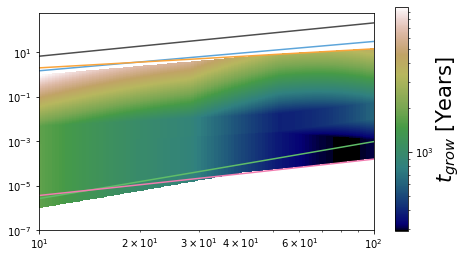

In [43]:
fig = plt.figure()
X, Y = np.meshgrid(a_au_arr,m_arr)
cmap = 'gist_earth'
im = plt.pcolormesh(X,Y,t_grow_arr, cmap=cmap,norm=LogNorm(),vmin=np.amin(t_grow_arr[np.where(t_grow_arr!=0)]),\
                                                                          vmax=np.amax(t_grow_arr))
plt.yscale('log')
plt.xscale('log')

msun_to_mearth = 3.003467e-6
T_arr = T_0*a_au_arr**(-3./7.)
cs = np.sqrt(fn.k*T_arr/fn.mu)
om = np.sqrt(fn.G*m_star*fn.m_sun/(a_au_arr*fn.au)**3.)
vk = a_au_arr*fn.au*om
v_0 = cs**2./2./vk
v_gas = np.sqrt(v_0**2. + alpha*cs**2.)
t_disk = 1e5/fn.sec_to_years
m_upper = np.sqrt(np.pi/2.)*(t_disk*om)**(-1.)*m_star/msun_to_mearth
m_upper_2 = 2*(2.*np.pi)**(1./4.)*(v_0/vk)*(t_disk*om)**(-1./2.)*m_star/msun_to_mearth
m_lower = 0.25*np.sqrt(np.pi/2.)*(v_gas**3./(v_0*t_disk*(a_au_arr*fn.au)**2.*om**3.))*m_star/msun_to_mearth
m_lower_2 = 1./16.*v_gas**3./vk**3.*m_star/msun_to_mearth

plt.semilogy(a_au_arr,m_upper)
plt.semilogy(a_au_arr,m_upper_2)
plt.semilogy(a_au_arr,cs**3./3**(0.5)/fn.G/om/fn.m_earth)
plt.semilogy(a_au_arr,m_lower) 
plt.semilogy(a_au_arr,m_lower_2)
# plt.loglog(a_au_arr,np.full(len(a_au_arr),1e1))
# plt.semilogy(a_au_arr,m_lower,linestyle=' ',marker='o')

cax = fig.add_axes([0.95, 0.123, 0.03, 0.778])
cb = fig.colorbar(im, cax=cax,cmap=cmap,norm=LogNorm())
cb.set_label(label=r'$t_{grow}$ [Years]',fontsize=21,labelpad=0.1)

In [44]:
def rate_odeint(m,t,p):

    alph,a_au,m_suns,temp,sig_gas,sig_p,verbose = p
    
    cs = np.sqrt(fn.k*temp/fn.mu)
    vth = np.sqrt(8./np.pi)*cs
    om = np.sqrt(fn.G*m_suns*fn.m_sun/(a_au*fn.au)**3.)
    H_g = cs/om
    rho_g = sig_gas/2./H_g
    rho_s = 2.
    vk = a_au*fn.au*om
    v0 = cs**2./2./vk
    st = 0.5*a_au*fn.au/t/v0
    s = st*rho_g*vth/rho_s/om
    
    rp = (3*m/4./np.pi/rho_s)**(1./3.)
    v_esc = np.sqrt(2*fn.G*m/rp)

    H_p = np.sqrt(alph/st)*H_g # Changed st_tst to st (Ask Mickey about this)
    rho_solid = sig_p/2./H_p
    v_inf = np.sqrt(alph)*cs
    bGF = rp*(v_esc/v_inf)
    sig_acc = 4*bGF**2.
    rate_GF = rho_solid*sig_acc*v_inf
    
    m_earths = m/fn.m_earth
    rate_peb = TvsR_sng(alph=alph,a_au=a_au,m_suns=m_suns,r=s,m_earths=m_earths,temp_in=temp,\
                                   sig_g_in=sig_gas,sig_p_in=sig_p,out='rate')*fn.sec_to_years
    
    tmp,r_ws,h_r,b_r,b_shear = TvsR_sng(alph=alph,a_au=a_au,m_suns=m_suns,r=s,m_earths=m_earths,temp_in=temp,\
                                   sig_g_in=sig_gas,sig_p_in=sig_p,out='len')
    
    r_tmp = min(r_ws,b_shear)
    r_stab = min(r_tmp,h_r)
    
    if r_stab < b_r:
        return 0
    
    rate = rate_peb + rate_GF
    if verbose:
#         print alph,a_au,m_suns,s,m_earths,temp,sig_gas,sig_p
        print(rate_peb, rate_GF)
    if m > 100*5.976e27: #100 earth masses
        return 0
    else:
        return rate

In [45]:
a_guess = 20.
index = np.where(a_au_arr<a_guess)[0][-1]

a_au = a_au_arr[index]
alpha = 1e-5
m_suns = 0.1
verbose = 0

sig_gas = disk_sigma(r=a_au,sigma0=sig_0,rcrit=r_crit)
sig_p = gas_to_dust[1,index]*sig_gas
T_0 = 14.9265380168
temp = T_0*a_au**(-3./7.)

p = [alpha,a_au,m_suns,temp,sig_gas,sig_p,verbose]
# time = 1e5/fn.sec_to_years
times = np.linspace(1e5,5e6,num=1e4)/fn.sec_to_years

m0_arr = np.array([1.01e-7,1.01e-6,1.00e-5])*fn.m_earth
m_arr = np.zeros((len(m0_arr),len(times)))

for i,m0 in enumerate(m0_arr):
    wsol = odeint(rate_odeint,m0,times,args=(p,))
    m_arr[i] = wsol.flatten()

/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:16: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
  app.launch_new_instance()
/miniconda3/lib/python3.7/site-packages/scipy/integrate/odepack.py:247: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)


/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in true_divide
  
/miniconda3/lib/python3.7/site-packages/numpy/ma/core.py:6666: RuntimeWarning: overflow encountered in power
  result = np.where(m, fa, umath.power(fa, fb)).view(basetype)


Text(0.5, 1.0, '$a = 20 \\, \\rm{AU}, \\, \\alpha = 10^{-5}$')

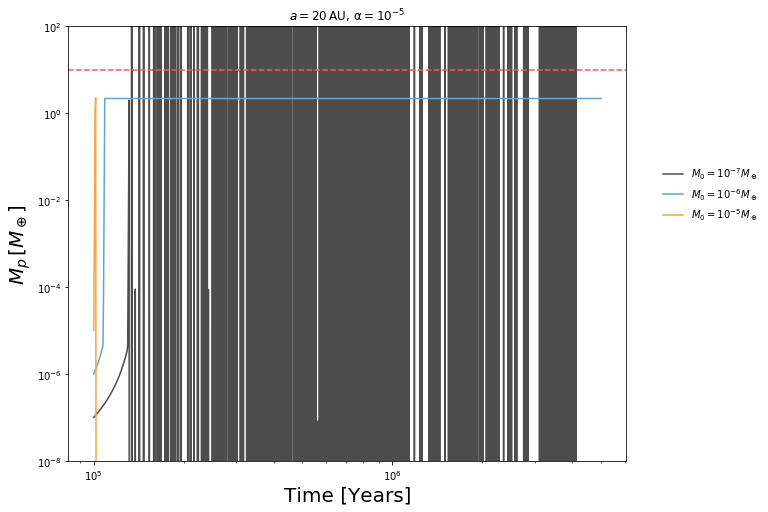

In [46]:
fig = plt.figure(figsize=(10,8))

labels = [r'$M_0 = 10^{-7} M_\oplus$',r'$M_0 = 10^{-6} M_\oplus$',r'$M_0 = 10^{-5} M_\oplus$']

for i in range(len(m0_arr)):
    plt.loglog(times*fn.sec_to_years,m_arr[i]/fn.m_earth,label=labels[i])
    
plt.ylim([1e-8,1e2])
plt.xlabel('Time [Years]',fontsize=20)
plt.ylabel(r'$M_p \, [M_\oplus]$',fontsize=20)

plt.axhline(y=1e1,linestyle='dashed',color= colors[-1])

lgd = plt.gca().legend(bbox_to_anchor=[1.25,0.70],frameon=False)

plt.title(r'$a = 20 \, \rm{AU}, \, \alpha = 10^{-5}$')
# plt.tight_layout()

In [349]:
fig.savefig('final_talk/MvsT_a20_alph5.pdf', bbox_extra_artists=(lgd,), bbox_inches='tight')

## GF of Pebbles

In [190]:
a_au = 50.
alph = 1e-2
st_tst = 1e-2
m = 1e-2*fn.m_earth
T_0 = 14.9265380168
m_suns = 0.1

sig_gas = disk_sigma(r=a_au,sigma0=sig_0,rcrit=r_crit)
sig_p = gas_to_dust[-2,index]*sig_gas
temp = T_0*a_au**(-3./7.)

cs = np.sqrt(fn.k*temp/fn.mu)
vth = np.sqrt(8./np.pi)*cs
om = np.sqrt(fn.G*m_suns*fn.m_sun/(a_au*fn.au)**3.)
H_g = cs/om
rho_g = sig_gas/2./H_g
rho_s = 2.
vk = a_au*fn.au*om
v0 = cs**2./2./vk

rp = (3*m/4./np.pi/rho_s)**(1./3.)
v_esc = np.sqrt(2*fn.G*m/rp)

H_p = np.sqrt(alph/st_tst)*H_g
rho_solid = sig_p/2./H_p
v_inf = np.sqrt(alph)*cs
bGF = rp*(v_esc/v_inf)
sig_acc = 4*bGF**2.
MdotGF = rho_solid*sig_acc*v_inf

t_GF = m/MdotGF*fn.sec_to_years

In [191]:
print '%.5g' %t_GF

2.5749e+07


In [187]:
a_guess = 50.
index = np.where(a_au_arr<a_guess)[0][-1]

a_au = a_au_arr[index]
alpha = 1e-2
m_suns = 0.1
verbose = 1

sig_gas = disk_sigma(r=a_au,sigma0=sig_0,rcrit=r_crit)
sig_p = gas_to_dust[-2,index]*sig_gas
T_0 = 14.9265380168
temp = T_0*a_au**(-3./7.)

p = [alpha,a_au,m_suns,temp,sig_gas,sig_p,verbose]
time = 1e5/fn.sec_to_years
# times = np.linspace(1e5,5e6,num=1e4)/fn.sec_to_years
m0 = 2e-5*fn.m_earth
rate_odeint(m0,time,p)

# wsol = odeint(rate_odeint,m0,times,args=(p,))

0.0 18853566.558993317


18853566.558993317

# Working with the disk gap v. mass relation from Lodato et al. 2019

In [85]:
# Extracted using automeris, from Fig 1
gap_mass_blue = np.loadtxt('gap_mass_blue.csv', delimiter=', ')
gap_mass_green = np.loadtxt('gap_mass_green.csv', delimiter=', ')

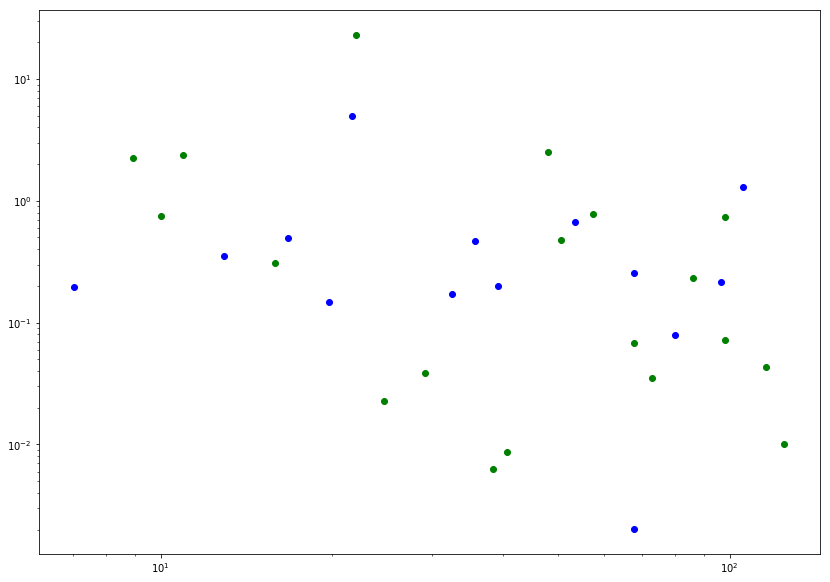

In [87]:
plt.loglog(gap_mass_blue[:,0], gap_mass_blue[:,1], 'bo')
plt.loglog(gap_mass_green[:,0], gap_mass_green[:,1], 'go')

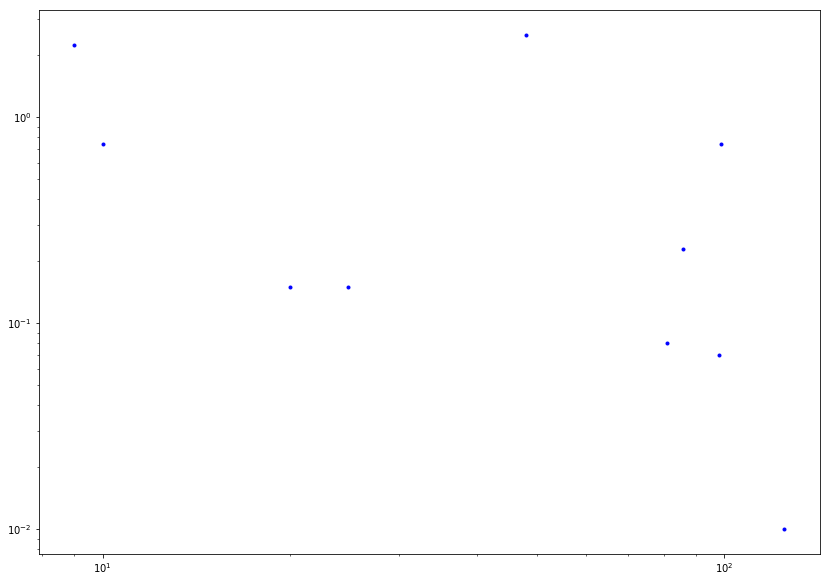

In [94]:
gap_data = np.zeros([10,2])
# TW Hydra
gap_data[0] = np.array([20, 0.15])
gap_data[1] = np.array([81, 0.08])
# AS 209
gap_data[2] = np.array([9, 2.25])
gap_data[3] = np.array([99, 0.74])
# HD 163296
gap_data[4] = np.array([10, 0.74])
gap_data[5] = np.array([48, 2.5])
gap_data[6] = np.array([86, 0.23])
# DoAr 25
gap_data[7] = np.array([98, 0.07])
gap_data[8] = np.array([125, 0.01])
# FT Tau
gap_data[9] = np.array([24.78, 0.15])

plt.loglog(gap_data[:,0], gap_data[:,1], 'b.')

In [388]:
# Also have lambda_obs, r_outer, T_0 = 82 K, R_crit = 30 AU, t_disk = 5 Myr (3 - 10 Myr)
#print(gap_mass_blue[7], gap_mass_blue[12]) # These two for TW Hydra: r(AU), M_p(M_J); 
#print(gap_mass_green[3], gap_mass_green[8], gap_mass_green[9]) # These three for HD 163296
#print(gap_mass_green[1], gap_mass_green[5]) # AS 209


tw_hydra = np.zeros([2,2])
tw_hydra[0] = gap_mass[7]
tw_hydra[1] = gap_mass[12]

t_disk = 5e6 * 3e7 # seconds
T_0 = 82 # K
R_crit = 30 # AU
def c_s(r, T_0=T_0):
    T = T_0* r**(-3./7)
    return fn.sound_speed(T)
def St(r, t_d=t_disk, T_0=T_0, r_crit=R_crit, m_star_sol=0.8):
    r_units = r*fn.au # Convert a from AU to cm
    v_k = np.sqrt(fn.G * m_star_sol*fn.m_sun/r_units) # Keplerian velocity in units of cm/s
    v_0 = c_s(r, T_0)**2/(2 * v_k)
    St = r_units / (2 * v_0 * t_d)
    #fn.mu/(t_disk * fn.k * T_0) * np.sqrt(fn.G * m_star_sol*fn.m_sun) * r_units**(13/14) * r_crit_units**(-3/7)
    return St
def v_g(r, t_d=t_disk, T_0=T_0, r_crit=R_crit, m_star_sol=0.8):
    r_units = r*fn.au
    m_star = m_star_sol*fn.m_sun
    alpha = 1e-3
    return np.sqrt(alpha)*c_s(r, T_0=T_0) #c_s(r, T_0=T_0)**2/np.sqrt(fn.G * m_star/r_units) * (1 + St(r,t_d=t_d,T_0=T_0,r_crit=r_crit,m_star_sol=m_star_sol)**2)/St(r,T_0=T_0,r_crit=r_crit,m_star_sol=m_star_sol)
def M_max(r, t_d=t_disk, T_0=T_0, r_crit=R_crit, m_star_sol=0.8):
    r_units = r*fn.au # Convert a from AU to cm
    #min1 = c_s(r,T_0=T_0)/(3 * v_g(r,t_d=t_d,T_0=T_0,r_crit=r_crit,m_star_sol=m_star_sol)) * St(r,t_d=t_d,T_0=T_0,r_crit=r_crit,m_star_sol=m_star_sol)
    min1 = 2/3 * np.sqrt(fn.G * m_star_sol*fn.m_sun/(r_units))/c_s(r, T_0=T_0) * St(r,t_d=t_d,T_0=T_0,r_crit=r_crit,m_star_sol=m_star_sol)
    min2 = np.sqrt(St(r,t_d=t_d,T_0=T_0,r_crit=r_crit,m_star_sol=m_star_sol))/3
    #print(r, min1, min2)
    pre_factor = np.minimum(min1, min2)
    omega = np.sqrt(fn.G * m_star_sol*fn.m_sun / r_units**3.)
    M_th = 22.5/318 * (r/5)**(3/4)
    #return pre_factor*M_th
    return [pre_factor, (1./np.sqrt(3) * c_s(r, T_0=T_0)**(3)/(fn.G * omega))/(1.898e30)] # Convert from cgs to M_J
    #return 4.4 * (3.14e-3) * (T_0/200)**(3./2.) * r**(6/7) * (m_star_sol)**(-1/2)
    
print(gap_data[:2]) # TW Hydra: a (AU), m_gap(M_J)
print(M_max(gap_data[0,0]))
print(M_max(gap_data[1,0]))
print(gap_data[2:4,1]) # AS 209: a (AU), m_gap(M_J)
print(M_max(gap_data[2,0], t_d=1.6e6*3e7, T_0=131, r_crit=98, m_star_sol=0.9))
print(M_max(gap_data[3,0], t_d=1.6e6*3e7, T_0=131, r_crit=98, m_star_sol=0.9))
print(gap_data[4:7,1]) # HD 163296
print(M_max(gap_data[4,0], t_d=5e6*3e7, T_0=284, r_crit=119, m_star_sol=2.3))
print(M_max(gap_data[5,0], t_d=5e6*3e7, T_0=284, r_crit=119, m_star_sol=2.3))
print(M_max(gap_data[6,0], t_d=5e6*3e7, T_0=284, r_crit=119, m_star_sol=2.3))
print(gap_data[7:9,1]) # DoAr 25
print(M_max(gap_data[7,0], t_d=2e6*3e7, T_0=123, r_crit=105, m_star_sol=1))
print(M_max(gap_data[8,0], t_d=2e6*3e7, T_0=123, r_crit=105, m_star_sol=1))

"""
m_array = np.linspace(0, 2.5, 1000)
#plt.loglog(tw_hydra[:,0], tw_hydra[:,1], 'b.')
plt.plot(gap_data[0,1], M_max(gap_data[0,0]), 'bo', label='TW Hydra')
plt.plot(gap_data[1,1], M_max(gap_data[1,0]), 'bo')
plt.plot(gap_data[2,1], M_max(gap_data[2,0], t_d=1.6e6*3e7, T_0=131, r_crit=98, m_star_sol=0.9), 'ro', label='AS 209')
plt.plot(gap_data[3,1], M_max(gap_data[3,0], t_d=1.6e6*3e7, T_0=131, r_crit=98, m_star_sol=0.9), 'ro')
plt.plot(gap_data[4,1], M_max(gap_data[4,0], t_d=5e6*3e7, T_0=284, r_crit=119, m_star_sol=2.3), 'mo', label='HD 163296')
plt.plot(gap_data[5,1], M_max(gap_data[5,0], t_d=5e6*3e7, T_0=284, r_crit=119, m_star_sol=2.3), 'mo')
plt.plot(gap_data[6,1], M_max(gap_data[6,0], t_d=5e6*3e7, T_0=284, r_crit=119, m_star_sol=2.3), 'mo')
plt.plot(gap_data[7,1], M_max(gap_data[7,0], t_d=2e6*3e7, T_0=123, r_crit=105, m_star_sol=1), 'go', label='DoAr 25')
plt.plot(gap_data[8,1], M_max(gap_data[8,0], t_d=2e6*3e7, T_0=123, r_crit=105, m_star_sol=1), 'go')
#plt.plot(m_array, m_array, )
plt.tick_params(axis='both', which='major', labelsize=14, length=6)
plt.tick_params(axis='both', which='minor', labelsize=12, length=4)
plt.xlabel('Gap Derived Mass (in Jupiter masses)', fontsize=18)
plt.ylabel('Isolation Mass (in Jupiter masses)', fontsize=18)
plt.legend(loc=4)
plt.savefig('Lodato_plot.pdf', dpi=800)"""


print(St(gap_data[:2,0]))
print(St(gap_data[2,0], t_d=1.6e6*3e7, T_0=131, r_crit=98, m_star_sol=0.9))
#print(M_max(tw_hydra[0,0]), M_max(tw_hydra[1,0]))

[[2.0e+01 1.5e-01]
 [8.1e+01 8.0e-02]]
[0.012862248048419234, 0.05161873531677854]
[0.024623487876186127, 0.17119185350997662]
[2.25 0.74]
[0.012787711354274657, 0.04956451339935376]
[0.03893109072588152, 0.3870732405797451]
[0.74 2.5  0.23]
[0.005979630054458457, 0.10832269497151874]
[0.013512967960863993, 0.41556648694841003]
[0.01771472657771567, 0.6850434667582637]
[0.07 0.01]
[0.036721206243565854, 0.3311966093577981]
[0.041113502950662545, 0.40801122750129515]
[0.00148894 0.00545685]
0.0014717300551222048


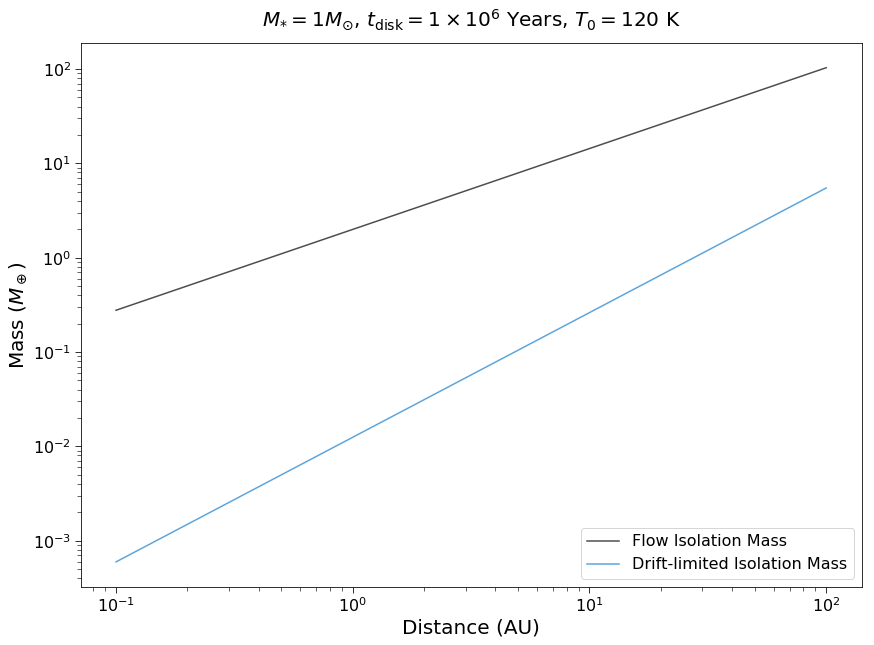

In [435]:
r_arr = np.logspace(-1,2,100)
M_max_arr = np.zeros([r_arr.size])
pre_fac_arr = np.zeros([r_arr.size])
for i in range(100):
    pre_fac_arr[i] = M_max(r_arr[i], t_d=1e6*3e7, T_0=120, m_star_sol=1)[0]
    M_max_arr[i] = 318 * M_max(r_arr[i], t_d=1e6*3e7, T_0=120, m_star_sol=1)[1]
    #M_max_arr[i] = 318* M_max(r_arr[i], T_0=200, m_star_sol=1)
plt.loglog(r_arr, M_max_arr, label='Flow Isolation Mass')
plt.loglog(r_arr, pre_fac_arr*M_max_arr, label='Drift-limited Isolation Mass')

plt.tick_params(axis='both', which='major', labelsize=16, length=6)
plt.tick_params(axis='both', which='minor', labelsize=14, length=4)
plt.xlabel('Distance (AU)', fontsize=20)
plt.ylabel('Mass ($M_\oplus$)', fontsize=20)
plt.title(r'$M_{*} = 1 M_{\odot}$, $t_{\rm{disk}} = 1 \times 10^{6}$ Years, $T_{0} = 120$ K',y=1.02, fontsize=20)
plt.legend(loc=4, prop={'size': 16})
plt.savefig('Flow_Iso_plot.pdf', dpi=800)

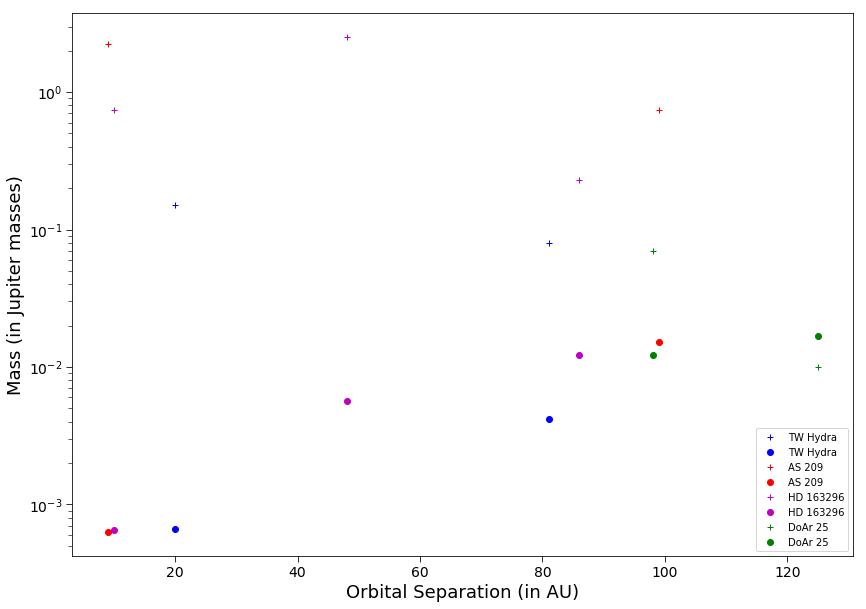

In [364]:
m_array = np.linspace(0, 2.5, 1000)
#plt.loglog(tw_hydra[:,0], tw_hydra[:,1], 'b.')
plt.semilogy(gap_data[0,0], gap_data[0,1], 'b+', label='TW Hydra')
plt.semilogy(gap_data[1,0], gap_data[1,1], 'b+')
plt.semilogy(gap_data[0,0], M_max(gap_data[0,0]), 'bo', label='TW Hydra')
plt.semilogy(gap_data[1,0], M_max(gap_data[1,0]), 'bo')
plt.semilogy(gap_data[2,0], gap_data[2,1], 'r+', label='AS 209')
plt.semilogy(gap_data[3,0], gap_data[3,1], 'r+')
plt.semilogy(gap_data[2,0], M_max(gap_data[2,0], t_d=1.6e6*3e7, T_0=131, r_crit=98, m_star_sol=0.9), 'ro', label='AS 209')
plt.semilogy(gap_data[3,0], M_max(gap_data[3,0], t_d=1.6e6*3e7, T_0=131, r_crit=98, m_star_sol=0.9), 'ro')
plt.semilogy(gap_data[4,0], gap_data[4,1], 'm+', label='HD 163296')
plt.semilogy(gap_data[5,0], gap_data[5,1], 'm+')
plt.semilogy(gap_data[6,0], gap_data[6,1], 'm+')
plt.semilogy(gap_data[4,0], M_max(gap_data[4,0], t_d=5e6*3e7, T_0=284, r_crit=119, m_star_sol=2.3), 'mo', label='HD 163296')
plt.semilogy(gap_data[5,0], M_max(gap_data[5,0], t_d=5e6*3e7, T_0=284, r_crit=119, m_star_sol=2.3), 'mo')
plt.semilogy(gap_data[6,0], M_max(gap_data[6,0], t_d=5e6*3e7, T_0=284, r_crit=119, m_star_sol=2.3), 'mo')
plt.semilogy(gap_data[7,0], gap_data[7,1], 'g+', label='DoAr 25')
plt.semilogy(gap_data[8,0], gap_data[8,1], 'g+')
plt.semilogy(gap_data[7,0], M_max(gap_data[7,0], t_d=2e6*3e7, T_0=123, r_crit=105, m_star_sol=1), 'go', label='DoAr 25')
plt.semilogy(gap_data[8,0], M_max(gap_data[8,0], t_d=2e6*3e7, T_0=123, r_crit=105, m_star_sol=1), 'go')
#plt.plot(m_array, m_array, 'k-')
plt.tick_params(axis='both', which='major', labelsize=14, length=6)
plt.tick_params(axis='both', which='minor', labelsize=12, length=4)
#plt.xlim(0,0.3)
#plt.ylim(0,0.3)
plt.xlabel('Orbital Separation (in AU)', fontsize=18)
plt.ylabel('Mass (in Jupiter masses)', fontsize=18)
plt.legend(loc=4)
plt.savefig('Lodato_plot.pdf', dpi=800)

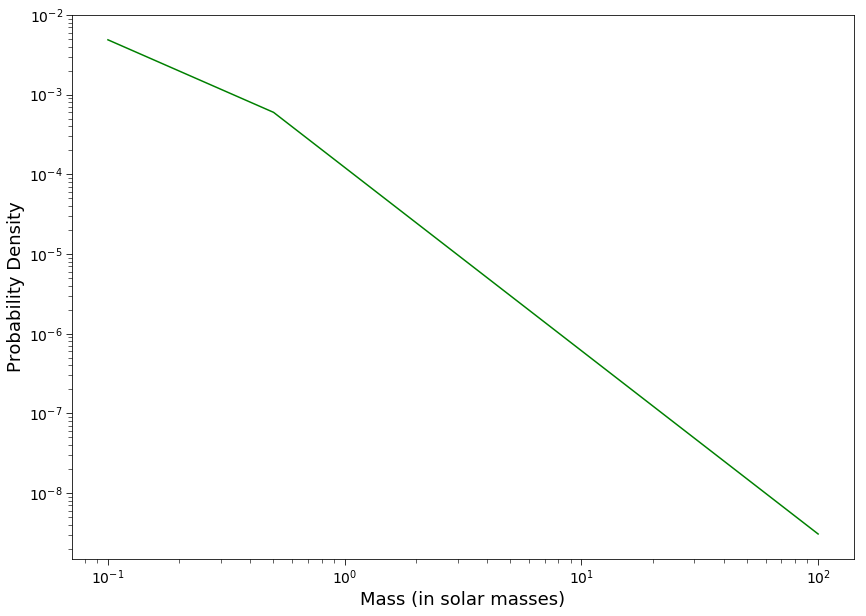

In [365]:
# Sampling Kroupa IMF
import scipy.integrate as integrate
def kroupa(m):
    norm = 0.32705769605379353 # integrated kroupa from .075 to 100
    if m < .08:
        alpha = .3
        return m**(-alpha)/norm
    elif m < .5:
        alpha = 1.3
        return .08 * m**(-alpha)/norm
    else:
        alpha = 2.3
        return .5 * .08 * m**(-alpha)/norm
def invertedKroupa(u):
    if u > kroupa(.08):
        return - np.log(u)/.3
    elif u > kroupa(.5):
        return - np.log(u)/(1.3 * .08)
    else:
        return - np.log(u)/(2.3 * .04)
    
m_array = np.logspace(-1,2,1000)
prob = np.zeros(1000)
for i in range(m_array.size):
    prob[i] = kroupa(m_array[i])
plt.rcParams["figure.figsize"] = [14,10]
plt.loglog(m_array, prob/1000,'g')
plt.tick_params(axis='both', which='major', labelsize=14, length=6)
plt.tick_params(axis='both', which='minor', labelsize=12, length=4)
plt.xlabel('Mass (in solar masses)', fontsize=18)
plt.ylabel('Probability Density', fontsize=18)
plt.savefig('IMF Plot.pdf', dpi=800)

In [366]:
# Just the gaps which infer a planet below 0.1 M_J
# T_0 = L**(2/7) * (1/(4 * sigma * pi))^(2/7) * (2/7)^(1/4) * (k/(mu * G * M))^(1/7)
small_planet_data = np.zeros([20,6]) # a, M_p, age (Myr), L_* (L_sun), M_*, M_flow
small_planet_data[0] = np.array([25, 0.02, 0.795, 2.23, 0.48, 0]) # Elias 20
small_planet_data[1] = np.array([69, 0.07, 0.8, 2.1, 0.55, 0]) # Elias 27
small_planet_data[2] = np.array([74, 0.035, 0.795, 0.3311, 0.46, 0]) # GW Lup
small_planet_data[3] = np.array([117, 0.04, 0.5, 2.33, 0.95, 0]) # IM Lup
small_planet_data[4] = np.array([29, 0.038, 10**(-0.3), 10**(0.16), 0.63, 0]) # RU Lup
small_planet_data[5] = np.array([39, 0.006, 10**(-0.3), 10**(-0.69), 0.17, 0]) # Sz 114
small_planet_data[6] = np.array([41, 0.008, 10**(0.6), 10**(-0.36), 0.83, 0]) # Sz 129
small_planet_data[7] = np.array([69, 0.002, 0.5, 0.11, 0.25, 0]) # GY 91
small_planet_data[8] = np.array([43.41, 0.077, 4.5, 6.3, 2.04, 0]) # RY Tau
small_planet_data[9] = np.array([69.05, 0.023, 3, 1.60, 1.016 + 0.294, 0]) # UZ Tau E
# DON'T TRUST THESE AGES
small_planet_data[10] = np.array([49.29, 0.009, .1, 10**(-0.14), 0.55, 0]) # DN Tau
small_planet_data[11] = np.array([58.91, 0.057, .1, 10**(-0.41), 0.42, 0]) # GO Tau
small_planet_data[12] = np.array([86.99, 0.07, .1, 10**(-0.41), 0.42, 0]) # GO Tau
small_planet_data[13] = np.array([41.15, 0.065, .1, 10**(-0.26), 10**(-0.36), 0]) # IQ Tau
small_planet_data[14] = np.array([39.29, 0.11, .1, 10**(0.11), 0.92, 0]) # DL Tau
small_planet_data[15] = np.array([66.95, 0.08, .1, 10**(0.11), 0.92, 0]) # DL Tau

for i in range(15):
    L = small_planet_data[i,3] * 3.848e33
    M = small_planet_data[i,4] * fn.m_sun
    T_0 = (L/(4 * 5.67e-5 * np.pi))**(2./7) * (2/7)**(1/4) * (fn.k/(fn.mu * fn.G * M))**(1/7) * (1.496e13)**(-3/7)
    print(T_0)
    small_planet_data[i,3] = T_0

small_planet_data[16] = np.array([98, 0.07, 2, 123, 1, 0]) # DoAr 25 (T_0 instead of L_sun)
small_planet_data[17] = np.array([125, 0.01, 2, 123, 1, 0]) # DoAr 25
small_planet_data[18] = np.array([20, 0.15, 5, 82, 0.8, 0]) # TW Hya
small_planet_data[19] = np.array([20, 0.15, 5, 82, 0.8, 0]) # TW Hya

159.8605427530037
154.11408845478454
93.2634710224634
146.8350781043288
135.8527904615618
93.6443658768323
92.76662820494558
74.26931320229893
174.9197205951519
125.96665434041425
113.70503239185325
98.93895401768013
98.93895401768013
108.60041854802995
124.53470055942087


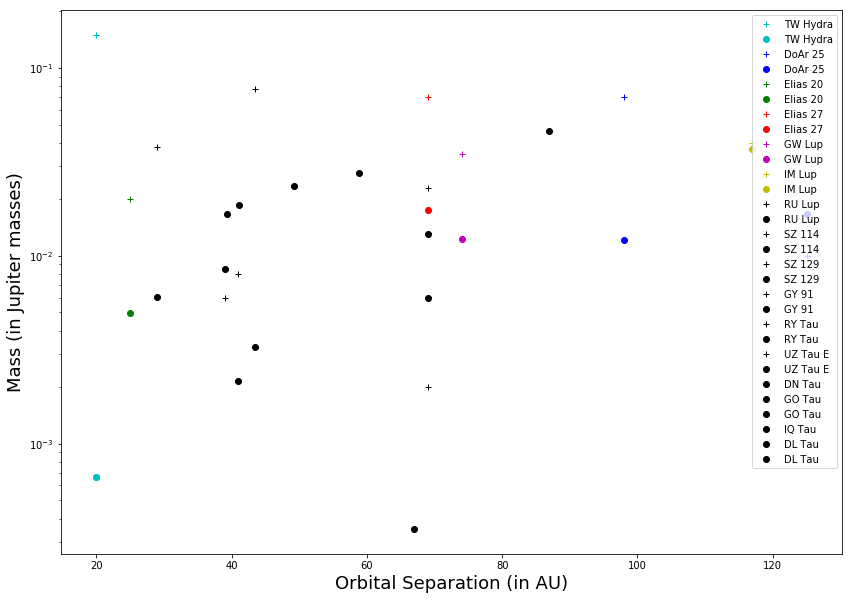

In [367]:
m_array = np.linspace(0, 2.5, 1000)
#plt.loglog(tw_hydra[:,0], tw_hydra[:,1], 'b.')
plt.semilogy(small_planet_data[18,0], small_planet_data[18,1], 'c+', label='TW Hydra')
plt.semilogy(small_planet_data[19,0], small_planet_data[19,1], 'c+')
small_planet_data[18,5] = M_max(small_planet_data[18,0])
small_planet_data[19,5] = M_max(small_planet_data[19,0])
plt.semilogy(small_planet_data[18,0], small_planet_data[18,5], 'co', label='TW Hydra')
plt.semilogy(small_planet_data[19,0], small_planet_data[19,5], 'co')
plt.semilogy(small_planet_data[16,0], small_planet_data[16,1], 'b+', label='DoAr 25')
plt.semilogy(small_planet_data[17,0], small_planet_data[17,1], 'b+')
small_planet_data[16,5] = M_max(small_planet_data[16,0], t_d=small_planet_data[16,2]*1e6*3e7, T_0=small_planet_data[16,3], r_crit=105, m_star_sol=1)
small_planet_data[17,5] = M_max(small_planet_data[17,0], t_d=small_planet_data[17,2]*1e6*3e7, T_0=small_planet_data[17,3], r_crit=105, m_star_sol=1)
plt.semilogy(small_planet_data[16,0], small_planet_data[16,5], 'bo', label='DoAr 25')
plt.semilogy(small_planet_data[17,0], small_planet_data[17,5], 'bo')

plt.semilogy(small_planet_data[0,0], small_planet_data[0,1], 'g+', label='Elias 20')
small_planet_data[0,5] = M_max(small_planet_data[0,0],t_d=small_planet_data[0,2]*1e6*3e7,T_0=small_planet_data[0,3],r_crit=57,m_star_sol=small_planet_data[0,4])
plt.semilogy(small_planet_data[0,0], small_planet_data[0,5], 'go', label='Elias 20')
plt.semilogy(small_planet_data[1,0], small_planet_data[1,1], 'r+', label='Elias 27')
small_planet_data[1,5] = M_max(small_planet_data[1,0], t_d=small_planet_data[1,2]*1e6*3e7, T_0=small_planet_data[1,3], r_crit=40, m_star_sol=small_planet_data[1,4])
plt.semilogy(small_planet_data[1,0], small_planet_data[1,5], 'ro', label='Elias 27')
plt.semilogy(small_planet_data[2,0], small_planet_data[2,1], 'm+', label='GW Lup')
small_planet_data[2,5] = M_max(small_planet_data[2,0], t_d=small_planet_data[2,2]*1e6*3e7, T_0=small_planet_data[2,3], r_crit=40, m_star_sol=small_planet_data[2,4])
plt.semilogy(small_planet_data[2,0], small_planet_data[2,5], 'mo', label='GW Lup')
plt.semilogy(small_planet_data[3,0], small_planet_data[3,1], 'y+', label='IM Lup')
small_planet_data[3,5] = M_max(small_planet_data[3,0], t_d=small_planet_data[3,2]*1e6*3e7, T_0=small_planet_data[3,3], r_crit=40, m_star_sol=small_planet_data[3,4])
plt.semilogy(small_planet_data[3,0], small_planet_data[3,5], 'yo', label='IM Lup')
plt.semilogy(small_planet_data[4,0], small_planet_data[4,1], 'k+', label='RU Lup')
small_planet_data[4,5] = M_max(small_planet_data[4,0], t_d=small_planet_data[4,2]*1e6*3e7, T_0=small_planet_data[4,3], r_crit=40, m_star_sol=small_planet_data[4,4])
plt.semilogy(small_planet_data[4,0], small_planet_data[4,5], 'ko', label='RU Lup')
plt.semilogy(small_planet_data[5,0], small_planet_data[5,1], 'k+', label='SZ 114')
small_planet_data[5,5] = M_max(small_planet_data[5,0], t_d=small_planet_data[5,2]*1e6*3e7, T_0=small_planet_data[5,3], r_crit=40, m_star_sol=small_planet_data[5,4])
plt.semilogy(small_planet_data[5,0], small_planet_data[5,5], 'ko', label='SZ 114')
plt.semilogy(small_planet_data[6,0], small_planet_data[6,1], 'k+', label='SZ 129')
small_planet_data[6,5] = M_max(small_planet_data[6,0], t_d=small_planet_data[6,2]*1e6*3e7, T_0=small_planet_data[6,3], r_crit=40, m_star_sol=small_planet_data[6,4])
plt.semilogy(small_planet_data[6,0], small_planet_data[6,5], 'ko', label='SZ 129')
plt.semilogy(small_planet_data[7,0], small_planet_data[7,1], 'k+', label='GY 91')
small_planet_data[7,5] = M_max(small_planet_data[7,0], t_d=small_planet_data[7,2]*1e6*3e7, T_0=small_planet_data[7,3], r_crit=40, m_star_sol=small_planet_data[7,4])
plt.semilogy(small_planet_data[7,0], small_planet_data[7,5], 'ko', label='GY 91')
plt.semilogy(small_planet_data[8,0], small_planet_data[8,1], 'k+', label='RY Tau')
small_planet_data[8,5] = M_max(small_planet_data[8,0], t_d=small_planet_data[8,2]*1e6*3e7, T_0=small_planet_data[8,3], r_crit=40, m_star_sol=small_planet_data[8,4])
plt.semilogy(small_planet_data[8,0], small_planet_data[8,5], 'ko', label='RY Tau')
plt.semilogy(small_planet_data[9,0], small_planet_data[9,1], 'k+', label='UZ Tau E')
small_planet_data[9,5] = M_max(small_planet_data[9,0], t_d=small_planet_data[9,2]*1e6*3e7, T_0=small_planet_data[9,3], r_crit=40, m_star_sol=small_planet_data[9,4])
plt.semilogy(small_planet_data[9,0], small_planet_data[9,5], 'ko', label='UZ Tau E')

# Now, the disks where we're guessing t_disk = 1 Myr
small_planet_data[10,5] = M_max(small_planet_data[10,0], t_d=small_planet_data[10,2]*1e6*3e7, T_0=small_planet_data[10,3], r_crit=40, m_star_sol=small_planet_data[10,4])
small_planet_data[11,5] = M_max(small_planet_data[11,0], t_d=small_planet_data[11,2]*1e6*3e7, T_0=small_planet_data[11,3], r_crit=40, m_star_sol=small_planet_data[11,4])
small_planet_data[12,5] = M_max(small_planet_data[12,0], t_d=small_planet_data[12,2]*1e6*3e7, T_0=small_planet_data[12,3], r_crit=40, m_star_sol=small_planet_data[12,4])
small_planet_data[13,5] = M_max(small_planet_data[13,0], t_d=small_planet_data[13,2]*1e6*3e7, T_0=small_planet_data[13,3], r_crit=40, m_star_sol=small_planet_data[13,4])
small_planet_data[14,5] = M_max(small_planet_data[14,0], t_d=small_planet_data[14,2]*1e6*3e7, T_0=small_planet_data[14,3], r_crit=40, m_star_sol=small_planet_data[14,4])
small_planet_data[15,5] = M_max(small_planet_data[15,0], t_d=small_planet_data[15,2]*1e6*3e7, T_0=small_planet_data[15,3], r_crit=40, m_star_sol=small_planet_data[15,4])
plt.semilogy(small_planet_data[10,0], small_planet_data[10,5], 'ko', label='DN Tau')
plt.semilogy(small_planet_data[11,0], small_planet_data[11,5], 'ko', label='GO Tau')
plt.semilogy(small_planet_data[12,0], small_planet_data[12,5], 'ko', label='GO Tau')
plt.semilogy(small_planet_data[13,0], small_planet_data[13,5], 'ko', label='IQ Tau')
plt.semilogy(small_planet_data[14,0], small_planet_data[14,5], 'ko', label='DL Tau')
plt.semilogy(small_planet_data[15,0], small_planet_data[15,5], 'ko', label='DL Tau')

plt.xlabel('Orbital Separation (in AU)', fontsize=18)
plt.ylabel('Mass (in Jupiter masses)', fontsize=18)
plt.legend()
plt.show()

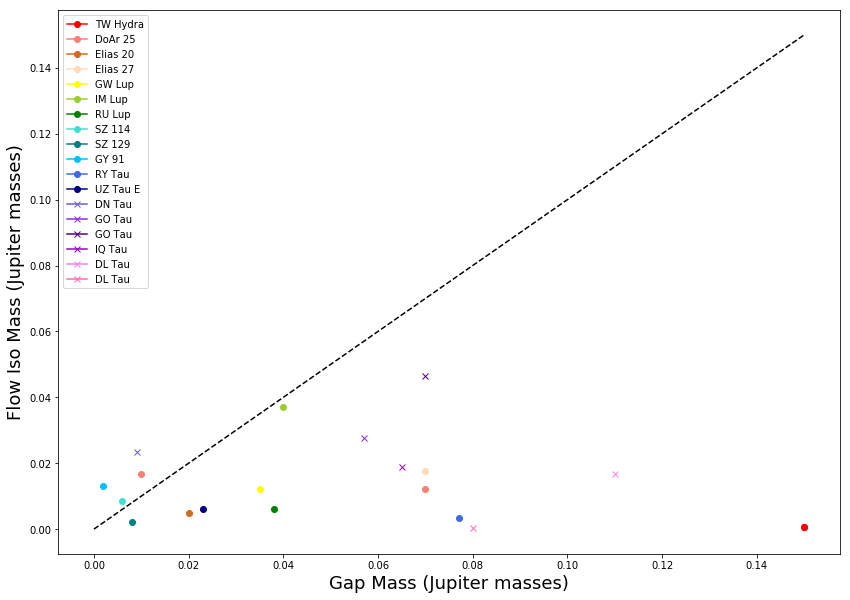

In [368]:
m_array = np.linspace(0, 0.15, 1000)
plt.plot(m_array, m_array, 'k--')
#plt.loglog(tw_hydra[:,0], tw_hydra[:,1], 'b.')
plt.plot(small_planet_data[18,1], small_planet_data[18,5], 'red', marker='o', label='TW Hydra')
plt.plot(small_planet_data[19,1], small_planet_data[19,5], 'red', marker='o')
plt.plot(small_planet_data[16,1], small_planet_data[16,5], 'salmon', marker='o', label='DoAr 25')
plt.plot(small_planet_data[17,1], small_planet_data[17,5], 'salmon', marker='o')

plt.plot(small_planet_data[0,1], small_planet_data[0,5], 'chocolate', marker='o', label='Elias 20')
plt.plot(small_planet_data[1,1], small_planet_data[1,5], 'peachpuff', marker='o', label='Elias 27')
plt.plot(small_planet_data[2,1], small_planet_data[2,5], 'yellow', marker='o', label='GW Lup')
plt.plot(small_planet_data[3,1], small_planet_data[3,5], 'yellowgreen', marker='o', label='IM Lup')
plt.plot(small_planet_data[4,1], small_planet_data[4,5], 'green', marker='o', label='RU Lup')
plt.plot(small_planet_data[5,1], small_planet_data[5,5], 'turquoise', marker='o', label='SZ 114')
plt.plot(small_planet_data[6,1], small_planet_data[6,5], 'teal', marker='o', label='SZ 129')
plt.plot(small_planet_data[7,1], small_planet_data[7,5], 'deepskyblue', marker='o', label='GY 91')
plt.plot(small_planet_data[8,1], small_planet_data[8,5], 'royalblue', marker='o', label='RY Tau')
plt.plot(small_planet_data[9,1], small_planet_data[9,5], 'navy', marker='o', label='UZ Tau E')

plt.plot(small_planet_data[10,1], small_planet_data[10,5], 'slateblue', marker='x', label='DN Tau')
plt.plot(small_planet_data[11,1], small_planet_data[11,5], 'blueviolet', marker='x', label='GO Tau')
plt.plot(small_planet_data[12,1], small_planet_data[12,5], 'indigo', marker='x', label='GO Tau')
plt.plot(small_planet_data[13,1], small_planet_data[13,5], 'darkviolet', marker='x', label='IQ Tau')
plt.plot(small_planet_data[14,1], small_planet_data[14,5], 'violet', marker='x', label='DL Tau')
plt.plot(small_planet_data[15,1], small_planet_data[15,5], 'hotpink', marker='x', label='DL Tau')

plt.ylabel('Flow Iso Mass (Jupiter masses)', fontsize=18)
plt.xlabel('Gap Mass (Jupiter masses)', fontsize=18)
plt.legend()
plt.show()